# Data Cleaning

In [298]:
#%reset

In [299]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None) #We want to see all columns of our dataset. 


In [300]:
#We make a function that read our saved excel files. And make it a df and remove the row index from when we saved the file. 

def read_saved_excel(Excel_string_name):
    read_df = pd.read_excel(Excel_string_name)    #Get the data from our saved excel
    read_df = pd.DataFrame(read_df) #make it to a dataframe in Python, with the Pandas inbuild function
    read_df.drop('Unnamed: 0', axis=1, inplace=True) #Remove the created row index from when we saved the file
    return read_df

In [301]:
raw_data = read_saved_excel("raw_data_final_final.xlsx")

In [302]:
raw_data

,case_id,type,energy_law_applies,energy_label_classification,presale,num_floors,num_rooms,living_area,basement_area,lot_area,year_built,sold_price,registered_price,address_id,rental,latest_status,weighted_area,closed_or_sold_at,original_price,unit_id,usage_code,living_area.1,business_area,num_rooms.1,updated_at,address_id.1,num_floors.1,year_built.1,year_renovated,ownership,building_id,num_toilets,toilet_condition_code,num_bathrooms,bathroom_condition_code,kitchen_condition_code,floor_id,status,property_number,building_id.1,building_number,entry_address_id,usage_code.1,year_built.2,year_renovated.1,outer_wall_code,roof_code,additional_outer_wall_mat,additional_roof_mat,asbestos_materials,total_area,living_area_total,business_area_total,other_area,heating_code,kitchen_amount,floors,updated_at.1,additional_heating_code,ownership.1,total_built_area,built_in_garage_area,built_in_carport_area,built_in_outhouse_area,conservatory_area,property_number.1,status.1,weighted_area.1,unit_usage_code_beskrivelse,address_id.2,is_apartment,unit_living_area,full_floor_living_area,roof_living_area,roof_other,basement_living_area,basement_other,garage_outhouse_built_in,garage_outhouse_free,carport,conservatory,annex,weighted_area.2,toilet_beskrivelse,køkken_beskrivelse,tag_beskrivelse,ydervægsmaterialebeskrivelse,heating_code.1,heating_code_additional,badeværelsebeskrivelse,postnradgadr,postnummernavn,kommunekode,kommune,vejnavn,husnr,dør,etage,gstkvhx_kommunekode_vejkode_husnr_x,ID_Count,school,roadtrain,junction,daycare,metro,doctor,soccerfield,hospital,stop,lake,supermarket,pharmacy,strain,airport,train,library,publicbath,coast,sportshall,forest,Location,dingeo_link,Radonrisiko,Støjmåling,Oversvømmelsesrisiko_skybrud,Meter_over_havet,Indbrudsrisiko,Bevaringsværdi,Største_parti,Valgdeltagelse,Afstemningsområde,AVM_pris,latest_prop_valuation,Year_Week,Year_Months,Year_Quarter,Kort rente,Lang rente,OMXC 25,Consumer price index,ForcedSalesOfPropertyInRegionHovedstaden,AnnualisedAgreedRate,ElPrice_incl_moms_4000kWh,BenzinPrice_incl_moms,DieselPrice_incl_moms,unemployedRate,Population,Water_view,Balcony,Opp_for_balcony,Rooftop Terrace,Opp_for_Rooftop_Terrace,Terrace,House Animals,wgs84_lat,wgs84_lon,ed50_x,ed50_y,erts89_utm32_x,erts89_utm32_y
0,19053496-b401-48cd-a1cd-4dbad107dee6,condo,0.0,NaN,False,NaN,2.0,76.0,NaN,NaN,1700.0,6450000,NaN,bbe10eeb-cddc-44d3-aebb-b0b11e31862b,False,sold,76.000000,2019-08-01 12:53:49.137000,NaN,3ca52175-6dbc-4c0a-ba66-0e4075b67add,140.0,76.0,NaN,2.0,2020-09-26 22:31:08.520000,bbe10eeb-cddc-44d3-aebb-b0b11e31862b,3.0,1700.0,NaN,private,156a3021-31be-4a7f-b9ee-2b2e1bd016e5,2.0,T,1.0,V,E,a7b96403-d996-44c3-b8b4-888f5297c799,primary,536572.0,156a3021-31be-4a7f-b9ee-2b2e1bd016e5,1,0a3f507b-01bf-32b8-e044-0003ba298018,140,1700.0,NaN,1,5,NaN,NaN,NaN,3558,3808.0,99.0,NaN,1,39.0,3.0,2019-01-25 07:19:26.310000,90.0,other,1186.0,NaN,NaN,NaN,NaN,536572.0,primary,76.0,"Etagebolig-bygning, flerfamiliehus eller tofam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vandskyllende toilet i enheden,Eget køkken med afløb,Tegl,Mursten,Fjernvarme/blokvarme,(UDFASES) Bygningen har ingen supplerende varme,Badeværelse i enheden,1401,København K,101,København,Strandgade,44B,tv,2.0,01016992_44D__2__tv,0,435.13,5739.46,5707.89,542.49,490.44,459.07,1975.85,3506.60,331.89,670.57,384.65,480.76,1957.41,7286.50,1957.41,481.06,2252.54,100.07,979.67,6590.06,Strandgade44BKøbenhavn,https://www.dingeo.dk/adresse/1401-København-K...,Meget lav,55-60 dB,kan være risiko,2.0 meter,lav,0.0,enhedslisten,87.3,3. Syd,5.224.446,1900000.0,2019W31,2019M08,2019Q3,-0.66980,1.12240,1124,103.5,22,1.606,221.548060,12.712222,11.012222,4.3,626350,0,0,0,0,0,0,0,55.675073,12.591777,725917.517346,6.175971e+06,725833.249760,6.175766e+06
1,5a7e3ae4-cd86-4c75-a7d3-dca07bd7f0f8,condo,0.0,c,False,NaN,2.0,50.0,NaN,NaN,1897.0,3165000,3165000.0,0a3f509e-0bb0-32b8-e044-0003ba298018,False,registered,50.000000,2022-03-20 17:47:48.000000,NaN,54e9b180-c28f-432d-bf72-1112ad2c2f

## Rough data cleaning


### Cleaning Rows
We want to make a rough cleaning. 
We only want to look at the usage_code = [120, 131, 132, 140].
And the ownership = private and if ownership is empty but ownership.1 = private.
And then we have been told that a case_id is unique, but we have spotted that there are some duplicates.
So we remove them too. 


In [303]:
def rough_cleaning(df_input):

    del1 = list(df_input.loc[~df_input['usage_code'].isin([120, 131, 132, 140])].index)
    new1 = df_input.drop(del1)
    
    #We remove all other than private owners and the empty
    del2 = list(new1.loc[~new1['ownership'].isin(['private', np.nan])].index) 
    new2 = new1.drop(del2)
    
    #We remove all other than private owners. Here we look for the empty in ownership and then private in ownership.1
    del3 = list(new2.loc[new2['ownership'].isin([np.nan])].loc[~new2['ownership.1'].isin(['private'])].index) 
    new3 = new2.drop(del3)

    #We clean for duplicates in case_id

    #First we find the duplicates
    dup = new3[new3.duplicated(['case_id'], keep=False)]
    
    #We remove alle the duplicates with NaN in num_toilets (We were seeing a pattern)
    dupli = dup.loc[dup['num_toilets'].isin([np.nan])]
    del4 = list(dupli.index)

    new4 = new3.drop(del4)

    #We remove alle the duplicates with value in num_toilets. 
    #There is 5 duplicates(10), with different building_id
    dup2 = dup.loc[~dup['num_toilets'].isin([np.nan])] 

    del5 = list(dup2[dup2.duplicated(['case_id'], keep=False)].index)
 
    new5 = new4.drop(del5)

    len1 = len(dupli[dupli.duplicated(['case_id'])])
    len2 = len(dup2[dup2.duplicated(['case_id'], keep=False)])
    len3 = len(dup2[dup2.duplicated(['case_id'])])
    len4 = len(new3[new3.duplicated(['case_id'])])
    len5 = len(new5)

    print('Deleted from usage_code = ' + str(len(del1)) )
    print('Deleted from ownership  = ' + str(len(del2) + len(del3)) )
    print('Deleted from num_toilets with NaN (Unique case_id deleted) = ' + str(len(del4)) + ' (' + str(len1) + ')')
    print('Deleted from num_toilets with value and was duplicated (Unique case_id deleted) = ' + str(len2) + ' (' + str(len3) + ')')
    print('Duplicated Unique case_id before dup. deletion (Unique case_id after deletion) = ' + str(len4) + ' (' +  str(len4 - len1 - len3)+ ')')
    print('New lenght of our dataframe (Check if True) = ' + str(len(df_input)) + ' - ' + str(len(del1) + len(del2) + len(del3) + len(del4) + len2) + ' = ' + str(len(df_input)-(len(del1) + len(del2) + len(del3) + len(del4) + len2)) + ' (' +  str(len(df_input)-(len(del1) + len(del2) + len(del3) + len(del4) + len2)==len5)+ ')' )

    return new5

In [304]:
rough_cleaning = rough_cleaning(raw_data)
rough_cleaning

#In the end of this section we also remove 126 observations for business_area.
#Deleted from usage_code = 2187 + later on( Deleted from business_area = 126) = 2313 

#New lenght of our dataframe 45.325 - 126(Deleted from business_area) = 45.199 

Deleted from usage_code = 2187
Deleted from ownership  = 4880
Deleted from num_toilets with NaN (Unique case_id deleted) = 42 (3)
Deleted from num_toilets with value and was duplicated (Unique case_id deleted) = 10 (5)
Duplicated Unique case_id before dup. deletion (Unique case_id after deletion) = 44 (36)
New lenght of our dataframe (Check if True) = 52444 - 7119 = 45325 (True)


,case_id,type,energy_law_applies,energy_label_classification,presale,num_floors,num_rooms,living_area,basement_area,lot_area,year_built,sold_price,registered_price,address_id,rental,latest_status,weighted_area,closed_or_sold_at,original_price,unit_id,usage_code,living_area.1,business_area,num_rooms.1,updated_at,address_id.1,num_floors.1,year_built.1,year_renovated,ownership,building_id,num_toilets,toilet_condition_code,num_bathrooms,bathroom_condition_code,kitchen_condition_code,floor_id,status,property_number,building_id.1,building_number,entry_address_id,usage_code.1,year_built.2,year_renovated.1,outer_wall_code,roof_code,additional_outer_wall_mat,additional_roof_mat,asbestos_materials,total_area,living_area_total,business_area_total,other_area,heating_code,kitchen_amount,floors,updated_at.1,additional_heating_code,ownership.1,total_built_area,built_in_garage_area,built_in_carport_area,built_in_outhouse_area,conservatory_area,property_number.1,status.1,weighted_area.1,unit_usage_code_beskrivelse,address_id.2,is_apartment,unit_living_area,full_floor_living_area,roof_living_area,roof_other,basement_living_area,basement_other,garage_outhouse_built_in,garage_outhouse_free,carport,conservatory,annex,weighted_area.2,toilet_beskrivelse,køkken_beskrivelse,tag_beskrivelse,ydervægsmaterialebeskrivelse,heating_code.1,heating_code_additional,badeværelsebeskrivelse,postnradgadr,postnummernavn,kommunekode,kommune,vejnavn,husnr,dør,etage,gstkvhx_kommunekode_vejkode_husnr_x,ID_Count,school,roadtrain,junction,daycare,metro,doctor,soccerfield,hospital,stop,lake,supermarket,pharmacy,strain,airport,train,library,publicbath,coast,sportshall,forest,Location,dingeo_link,Radonrisiko,Støjmåling,Oversvømmelsesrisiko_skybrud,Meter_over_havet,Indbrudsrisiko,Bevaringsværdi,Største_parti,Valgdeltagelse,Afstemningsområde,AVM_pris,latest_prop_valuation,Year_Week,Year_Months,Year_Quarter,Kort rente,Lang rente,OMXC 25,Consumer price index,ForcedSalesOfPropertyInRegionHovedstaden,AnnualisedAgreedRate,ElPrice_incl_moms_4000kWh,BenzinPrice_incl_moms,DieselPrice_incl_moms,unemployedRate,Population,Water_view,Balcony,Opp_for_balcony,Rooftop Terrace,Opp_for_Rooftop_Terrace,Terrace,House Animals,wgs84_lat,wgs84_lon,ed50_x,ed50_y,erts89_utm32_x,erts89_utm32_y
0,19053496-b401-48cd-a1cd-4dbad107dee6,condo,0.0,NaN,False,NaN,2.0,76.0,NaN,NaN,1700.0,6450000,NaN,bbe10eeb-cddc-44d3-aebb-b0b11e31862b,False,sold,76.000000,2019-08-01 12:53:49.137000,NaN,3ca52175-6dbc-4c0a-ba66-0e4075b67add,140.0,76.0,NaN,2.0,2020-09-26 22:31:08.520000,bbe10eeb-cddc-44d3-aebb-b0b11e31862b,3.0,1700.0,NaN,private,156a3021-31be-4a7f-b9ee-2b2e1bd016e5,2.0,T,1.0,V,E,a7b96403-d996-44c3-b8b4-888f5297c799,primary,536572.0,156a3021-31be-4a7f-b9ee-2b2e1bd016e5,1,0a3f507b-01bf-32b8-e044-0003ba298018,140,1700.0,NaN,1,5,NaN,NaN,NaN,3558,3808.0,99.0,NaN,1,39.0,3.0,2019-01-25 07:19:26.310000,90.0,other,1186.0,NaN,NaN,NaN,NaN,536572.0,primary,76.0,"Etagebolig-bygning, flerfamiliehus eller tofam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vandskyllende toilet i enheden,Eget køkken med afløb,Tegl,Mursten,Fjernvarme/blokvarme,(UDFASES) Bygningen har ingen supplerende varme,Badeværelse i enheden,1401,København K,101,København,Strandgade,44B,tv,2.0,01016992_44D__2__tv,0,435.13,5739.46,5707.89,542.49,490.44,459.07,1975.85,3506.60,331.89,670.57,384.65,480.76,1957.41,7286.50,1957.41,481.06,2252.54,100.07,979.67,6590.06,Strandgade44BKøbenhavn,https://www.dingeo.dk/adresse/1401-København-K...,Meget lav,55-60 dB,kan være risiko,2.0 meter,lav,0.0,enhedslisten,87.3,3. Syd,5.224.446,1900000.0,2019W31,2019M08,2019Q3,-0.66980,1.12240,1124,103.5,22,1.606,221.548060,12.712222,11.012222,4.3,626350,0,0,0,0,0,0,0,55.675073,12.591777,725917.517346,6.175971e+06,725833.249760,6.175766e+06
1,5a7e3ae4-cd86-4c75-a7d3-dca07bd7f0f8,condo,0.0,c,False,NaN,2.0,50.0,NaN,NaN,1897.0,3165000,3165000.0,0a3f509e-0bb0-32b8-e044-0003ba298018,False,registered,50.000000,2022-03-20 17:47:48.000000,NaN,54e9b180-c28f-432d-bf72-1112ad2c2f

In [305]:
rough_cleaning['case_id'].is_unique

True

### Cleaning columns

We were given alot of ID and time variables, which we are not going to use in this thesis. 
So we remove these from our data.

Also we look to find if any of our columns is NaN our the same in all rows. 



We first look for columns only filled with NaN.

In [306]:
pd.set_option('display.max_rows', None)
rough_cleaning.isna().sum()[rough_cleaning.isna().sum() == len(rough_cleaning)]

original_price    45325
annex             45325
dtype: int64

In [307]:
pd.reset_option('display.max_rows')

We can above see that this is the columns original_price and annex. 

We also look into the data itself, and look for if the value is the same.




In [308]:
def look_for_same_value_in_all_rows(df_input):
    column_list = list(df_input.columns)
    list_with_columns_to_remove = []
    
    for i in range(0, len(column_list)):
        if len(df_input[column_list[i]].drop_duplicates()) == 1: #We will here spot all columns with only 1 answer. Could be all NaN or 0's or False. 
            print('Remove column : ' + str(i) + ' (' + column_list[i] + ')' )

            list_with_columns_to_remove.extend([column_list[i]])
           


    for j in range(0, len(column_list)):  
        if len(df_input[column_list[j]].drop_duplicates()) == 2: #Here we will spot all columns with only 2 answers, could be 1 and 0, or København and Frederiksberg, or True and False, ect.
            print('Columns with 2 answers : ' + str(j) + ' (' + column_list[j] + ')' )
    return list_with_columns_to_remove

In [309]:
list_with_columns_to_remove = look_for_same_value_in_all_rows(rough_cleaning)

Remove column : 14 (rental)
Remove column : 18 (original_price)
Remove column : 81 (annex)
Remove column : 151 (Opp_for_Rooftop_Terrace)
Columns with 2 answers : 2 (energy_law_applies)
Columns with 2 answers : 4 (presale)
Columns with 2 answers : 15 (latest_status)
Columns with 2 answers : 29 (ownership)
Columns with 2 answers : 70 (is_apartment)
Columns with 2 answers : 92 (kommunekode)
Columns with 2 answers : 93 (kommune)
Columns with 2 answers : 147 (Water_view)
Columns with 2 answers : 148 (Balcony)
Columns with 2 answers : 149 (Opp_for_balcony)
Columns with 2 answers : 150 (Rooftop Terrace)
Columns with 2 answers : 152 (Terrace)
Columns with 2 answers : 153 (House Animals)


From above we can see we have to remove: 


Remove column : 14 (rental)


Remove column : 18 (original_price)


Remove column : 81 (annex)


Remove column : 146 (Opp_for_Rooftop_Terrace)

We remove the 4 columns:

In [310]:
rough_cleaning.drop(columns=list_with_columns_to_remove, inplace=True)

In [311]:
rough_cleaning.loc[~rough_cleaning['num_floors'].isna()].loc[rough_cleaning['num_floors']>1].loc[rough_cleaning['num_floors']>=rough_cleaning['num_floors.1']][['num_floors','num_floors.1']]

,num_floors,num_floors.1
25,4.0,1.0
26,2.0,2.0
28,3.0,1.0
34,3.0,1.0
35,3.0,1.0
...,...,...
52399,3.0,3.0
52412,3.0,3.0
52419,4.0,4.0
52432,3.0,1.0


We now have a list we manually have looked at, and remove: 

In [312]:
def cleaning_floors_and_rooms_and_price_and_weightedArea(df_input):
    
    ############################################################################################################################
    ####################################################  FLOORS ###############################################################
    ############################################################################################################################
    #NF = empty and etage not empty. We set them equal 1. There is 1 terraced house, the rest is condo and villa apartment. 
    #There is (9196)
    list_set_equal_1 = list(df_input.loc[df_input['num_floors'].isna()].loc[~df_input['etage'].isna()].index) 

    #NF = empty and etage = empty. Here we set NF = NF.1. 
    #There is (291)
    list_set_equal_NF1 = list(df_input.loc[df_input['num_floors'].isna()].loc[df_input['etage'].isna()].index)
    
    #NF NOT empty and NF is NOT = 1 and NF>=NF.1. Here we set NF = NF.1. 
    #There is (6161)
    list_set_also_equal_NF1 = list(df_input.loc[~df_input['num_floors'].isna()].loc[df_input['num_floors']>1].loc[df_input['num_floors']>=df_input['num_floors.1']].index)


    #We insert 1
    df_input.loc[list_set_equal_1,['num_floors']] = 1

    #And we insert NF.1
    for i in range(0,len(list_set_equal_NF1)):
        df_input.loc[list_set_equal_NF1[i], 'num_floors'] = df_input.loc[list_set_equal_NF1[i], 'num_floors.1']

    for j in range(0,len(list_set_also_equal_NF1)):
        df_input.loc[list_set_also_equal_NF1[j], 'num_floors'] = df_input.loc[list_set_also_equal_NF1[j], 'num_floors.1']

    ############################################################################################################################
    ####################################################  ROOMS  ###############################################################
    ############################################################################################################################

    #We keep the num_rooms data as it is. Because there can have been a change in rooms since it was sold and it was updated from BBR. 
    
    #NR = empty -> Here we set NR = NR.1. 
    #There is (63)
    list_set_equal_NR1 = list(df_input.loc[df_input['num_rooms'].isna()].index)

    #We insert NR.1 
    for k in range(0,len(list_set_equal_NR1)):
        df_input.loc[list_set_equal_NR1[k], 'num_rooms'] = df_input.loc[list_set_equal_NR1[k], 'num_rooms.1']


    ############################################################################################################################
    #################################################### sold_price ############################################################
    ############################################################################################################################
    
    #For the registered_price we write over the sold_price, because as Johan explained in the mail, that the price is the most correct, because it is the "tinglyste pris". 
    #But we don't do it when they are equal to eachother. 
    
    list_set_equal_RP = list(df_input.loc[~df_input['registered_price'].isna()].loc[~(df_input['sold_price']==df_input['registered_price'])].index)

    #We insert NR.1 
    for k in range(0,len(list_set_equal_RP)):
        df_input.loc[list_set_equal_RP[k], 'sold_price'] = df_input.loc[list_set_equal_RP[k], 'registered_price']


    ############################################################################################################################
    ################################################### Weighted_area ##########################################################
    ############################################################################################################################

    #For NaN in weighted_area(WA) and with a value in weighted_area.2(WA2), we use this value. BUT only when living_area <= weighted_area.2. 
    #We can't have a weighted_area below the living_area. 
    list_set_WA_equal_WA2 = list(df_input.loc[df_input['weighted_area'].isna()].loc[~df_input['weighted_area.2'].isna()].loc[df_input['living_area']<=df_input['weighted_area.2']].index)

    #We insert WA2 
    for k in range(0,len(list_set_WA_equal_WA2)):
        df_input.loc[list_set_WA_equal_WA2[k], 'weighted_area'] = df_input.loc[list_set_WA_equal_WA2[k], 'weighted_area.2']

    #For NaN in weighted_area(WA) and NaN in weighted_area.2(WA2), when LA > WA2, we use the living_area(LA) value.
    list_set_WA_equal_LA_3 = list(df_input.loc[df_input['weighted_area'].isna()].loc[~df_input['weighted_area.2'].isna()].loc[~(df_input['living_area']<=df_input['weighted_area.2'])].index)

    #We insert LA 
    for k in range(0,len(list_set_WA_equal_LA_3)):
        df_input.loc[list_set_WA_equal_LA_3[k], 'weighted_area'] = df_input.loc[list_set_WA_equal_LA_3[k], 'living_area']


    #For NaN in weighted_area and NaN in weighted_area.2(WA2), we use the living_area(LA) value, which is not NaN(There is 1). 
    list_set_WA_equal_LA = list(df_input.loc[df_input['weighted_area'].isna()].loc[df_input['weighted_area.2'].isna()].loc[~df_input['living_area'].isna()].index)

    #We insert LA 
    for k in range(0,len(list_set_WA_equal_LA)):
        df_input.loc[list_set_WA_equal_LA[k], 'weighted_area'] = df_input.loc[list_set_WA_equal_LA[k], 'living_area']



    #If we got some living_area > weighted_area, we insert the living_area value.  
    list_set_WA_equal_LA_2 = list(df_input.loc[df_input['weighted_area']<df_input['living_area']].index)

    #We insert LA 
    for k in range(0,len(list_set_WA_equal_LA_2)):
        df_input.loc[list_set_WA_equal_LA_2[k], 'weighted_area'] = df_input.loc[list_set_WA_equal_LA_2[k], 'living_area']

    
    return df_input
    


In [313]:
rough_cleaning = cleaning_floors_and_rooms_and_price_and_weightedArea(rough_cleaning)

In [314]:
#rough_cleaning.to_excel("rough_cleaning.xlsx")

In [315]:
drop_columns =['case_id', 'registered_price', 'latest_status', 'unit_id', 'usage_code', 'living_area.1', 'num_rooms.1', 'updated_at', 'address_id.1', 'num_floors.1', 'year_built.1', 'ownership', 'building_id', 'toilet_condition_code', 'bathroom_condition_code', 'kitchen_condition_code', 'floor_id', 'status', 'property_number', 'building_id.1', 'building_number', 'entry_address_id', 'usage_code.1', 'year_built.2', 'year_renovated.1', 'outer_wall_code', 'roof_code', 'additional_outer_wall_mat', 'additional_roof_mat', 'asbestos_materials', 'total_area', 'living_area_total', 'business_area_total', 'other_area', 'heating_code', 'kitchen_amount', 'updated_at.1', 'additional_heating_code', 'ownership.1', 'total_built_area', 'property_number.1', 'status.1', 'weighted_area.1', 'address_id.2', 'is_apartment', 'unit_living_area', 'full_floor_living_area', 'roof_living_area', 'roof_other', 'basement_living_area', 'basement_other', 'weighted_area.2', 'kommunekode', 'gstkvhx_kommunekode_vejkode_husnr_x', 'ID_Count', 'Location', 'dingeo_link', 'ed50_x', 'ed50_y', 'erts89_utm32_x', 'erts89_utm32_y']
drop_columns


['case_id',
 'registered_price',
 'latest_status',
 'unit_id',
 'usage_code',
 'living_area.1',
 'num_rooms.1',
 'updated_at',
 'address_id.1',
 'num_floors.1',
 'year_built.1',
 'ownership',
 'building_id',
 'toilet_condition_code',
 'bathroom_condition_code',
 'kitchen_condition_code',
 'floor_id',
 'status',
 'property_number',
 'building_id.1',
 'building_number',
 'entry_address_id',
 'usage_code.1',
 'year_built.2',
 'year_renovated.1',
 'outer_wall_code',
 'roof_code',
 'additional_outer_wall_mat',
 'additional_roof_mat',
 'asbestos_materials',
 'total_area',
 'living_area_total',
 'business_area_total',
 'other_area',
 'heating_code',
 'kitchen_amount',
 'updated_at.1',
 'additional_heating_code',
 'ownership.1',
 'total_built_area',
 'property_number.1',
 'status.1',
 'weighted_area.1',
 'address_id.2',
 'is_apartment',
 'unit_living_area',
 'full_floor_living_area',
 'roof_living_area',
 'roof_other',
 'basement_living_area',
 'basement_other',
 'weighted_area.2',
 'kommuneko

In [316]:
rough_cleaning2 = rough_cleaning.drop(columns=drop_columns)

In [317]:
# These 126 observations with business_area has a mean on 9.531.230 DKK. So we remove these observations and then the column, because the rest is NaN. 
rough_cleaning2.loc[~rough_cleaning2['business_area'].isna()]['sold_price'].mean() 

9531230.341269841

In [318]:
len(rough_cleaning2.loc[~rough_cleaning2['business_area'].isna()])

126

In [319]:
del_business_area = list(rough_cleaning2.loc[~rough_cleaning2['business_area'].isna()].index)


In [320]:
rough_cleaning2.drop(del_business_area, inplace=True)

In [321]:
rough_cleaning2.drop(columns=['business_area'], inplace=True)

In [322]:
#rough_cleaning2.to_excel("rough_cleaning2.xlsx")

In [323]:
len(rough_cleaning2.columns)

94

## Fine Cleaning


* ### num_floors

We see that num_floors have some high values sometimes. Which we think must be a mistake. 
First we look at it with mean and median. 

In [324]:
rough_cleaning2['num_floors'].describe() #Here we see the mean is  1.228461 and the median is 1.0. 

count    45199.000000
mean         1.227837
std          0.852705
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         15.000000
Name: num_floors, dtype: float64

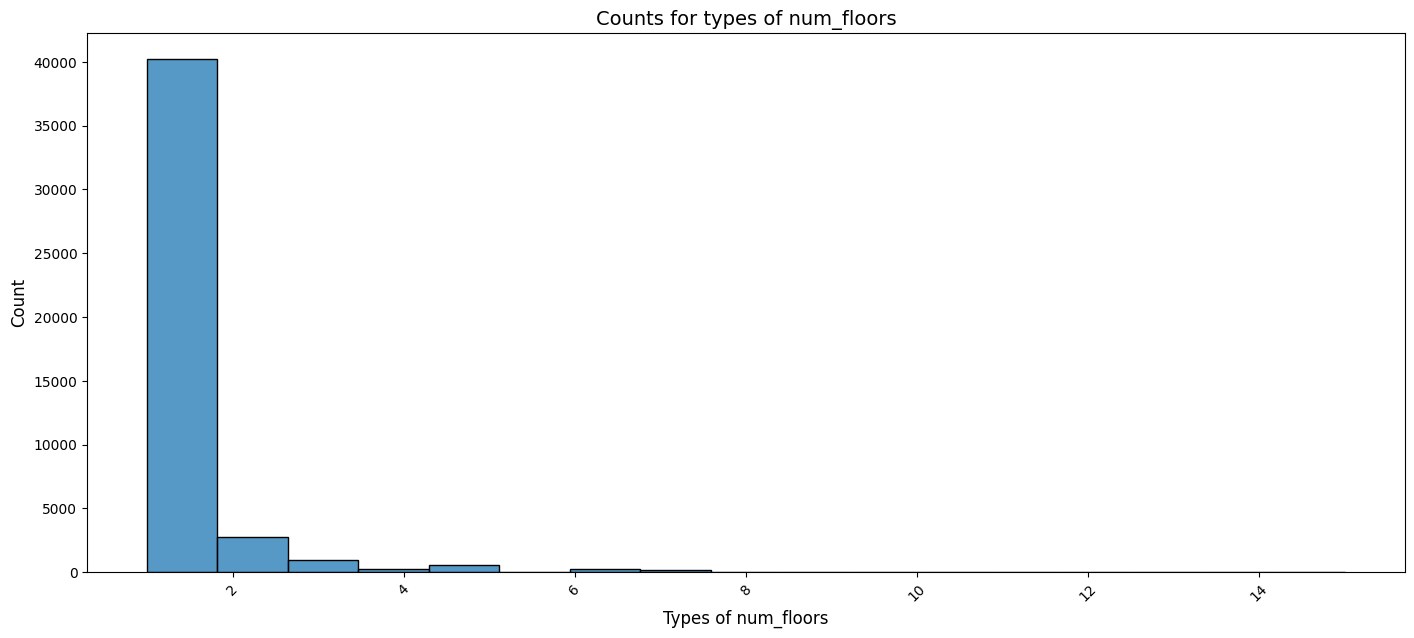

In [325]:
column_name = 'num_floors'
plt.figure(figsize=(17, 7))
sns.histplot(rough_cleaning2[column_name])
plt.xlabel('Types of ' + column_name, fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Counts for types of ' + column_name, fontsize=14)
plt.xticks(rotation = 45)
None #don't show the label objects

Above we can see that most of our real estats has 1 floor, and some 2 and 3. 

Maybe some luxery condo also has 4 num_floors, but in general in copenhagen we don't have houses or apartments with 4 or more. Then it is usaually not a living area. 
So we choose to remove the observations with more than 3 numbers of floors. 

In [326]:
len(rough_cleaning2.loc[rough_cleaning2['num_floors'] > 3])

1239

In [327]:
delete_num_floors = list(rough_cleaning2.loc[rough_cleaning2['num_floors'] > 3].index) # 1245 rows

fine_cleaning = rough_cleaning2.drop(delete_num_floors)

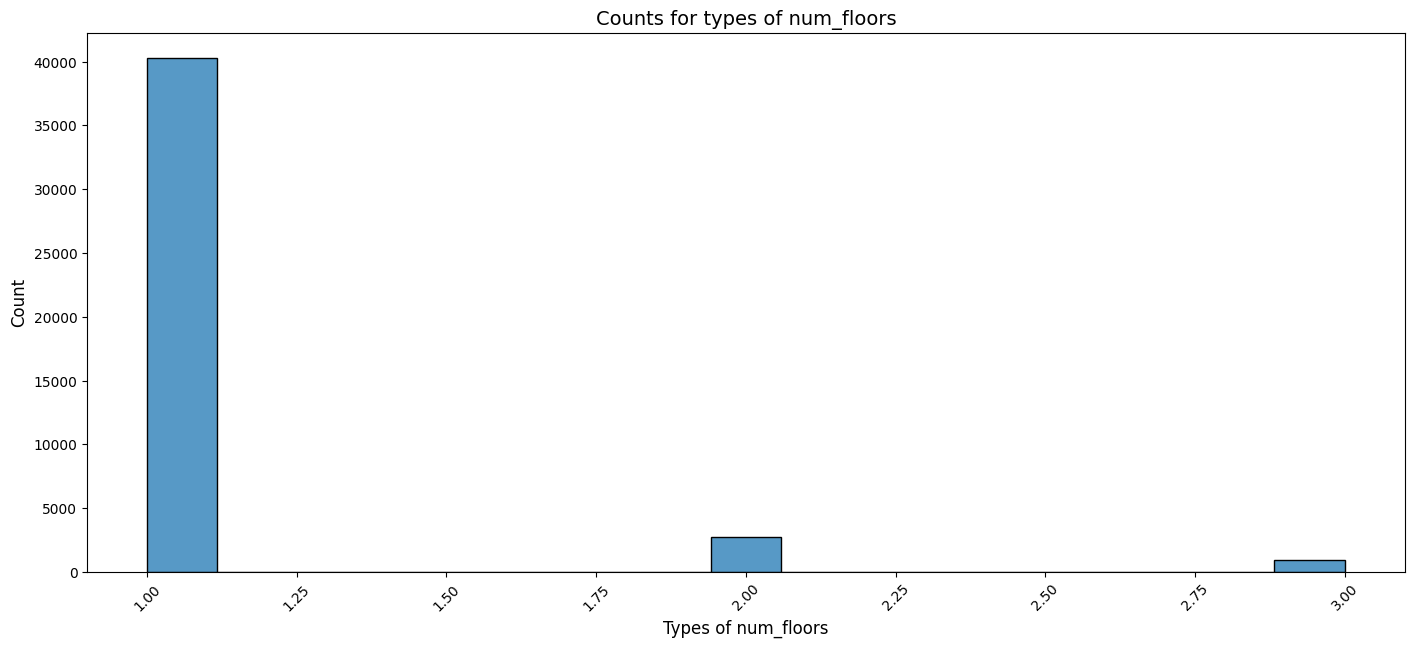

In [328]:
column_name = 'num_floors'
plt.figure(figsize=(17, 7))
sns.histplot(fine_cleaning[column_name])
plt.xlabel('Types of ' + column_name, fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Counts for types of ' + column_name, fontsize=14)
plt.xticks(rotation = 45)
None #don't show the label objects

* ### closed_or_sold_at and saleYear

In [329]:
fine_cleaning['closed_or_sold_at'] = (pd.to_datetime(pd.Series(fine_cleaning['closed_or_sold_at'])).dt.date).astype(np.datetime64)
fine_cleaning.rename(columns = {'closed_or_sold_at':'saleDate'}, inplace = True)

In [330]:
#saleYear
fine_cleaning['saleYear'] = fine_cleaning['Year_Week'].str[0:4].astype(int) #We add a column with year


In [331]:
fine_cleaning['saleYear']

0        2019
1        2022
2        2019
3        2017
4        2021
         ... 
52439    2021
52440    2021
52441    2021
52442    2020
52443    2022
Name: saleYear, Length: 43960, dtype: int32

* ### energy_label_classification

In [332]:
len(fine_cleaning[fine_cleaning['energy_label_classification'].isna()])

1472

In [333]:
delete_energy_label_classification = list(fine_cleaning[fine_cleaning['energy_label_classification'].isna()].index) # 1490 rows


fine_cleaning.drop(delete_energy_label_classification, inplace=True)

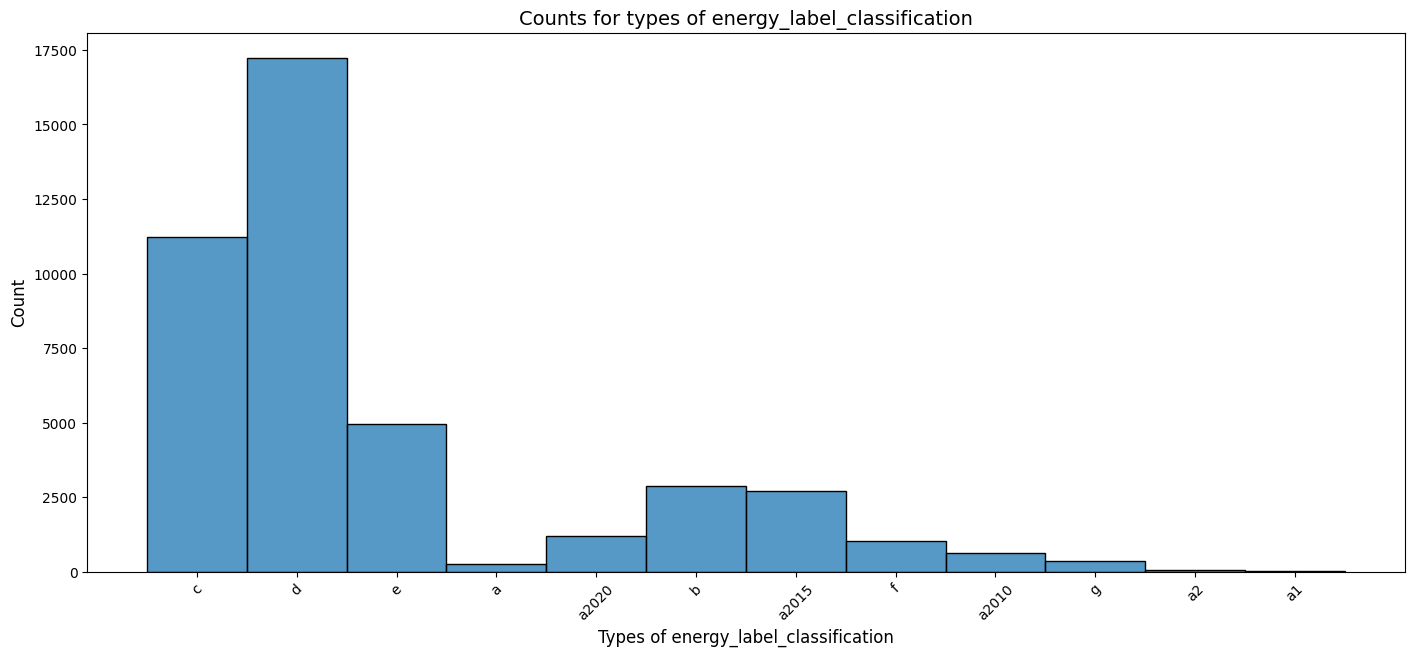

In [334]:
column_name = 'energy_label_classification'
plt.figure(figsize=(17, 7))
sns.histplot(fine_cleaning[column_name])
plt.xlabel('Types of ' + column_name, fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Counts for types of ' + column_name, fontsize=14)
plt.xticks(rotation = 45)
None #don't show the label objects

* ### year_built

In [335]:
len(fine_cleaning[fine_cleaning['year_built'].isna()])

63

In [336]:
delete_year_built = list(fine_cleaning[fine_cleaning['year_built'].isna()].index) # 63 rows


fine_cleaning.drop(delete_year_built, inplace=True)

In [337]:
len(fine_cleaning[fine_cleaning['year_built'] < 1750])

43

In [338]:
#fine_cleaning.loc[fine_cleaning['year_built'] < 1750].loc[fine_cleaning['Bevaringsværdi'] > 0] #We remove also buildings with year below 1750 (which has no "Bevaringsværdi")

#We saw that we had some houses/condos with "Bevaringsværdi" from build year 1750.

delete_year_built2 = list(fine_cleaning[fine_cleaning['year_built'] < 1750].index) # 43 rows


fine_cleaning.drop(delete_year_built2, inplace=True)

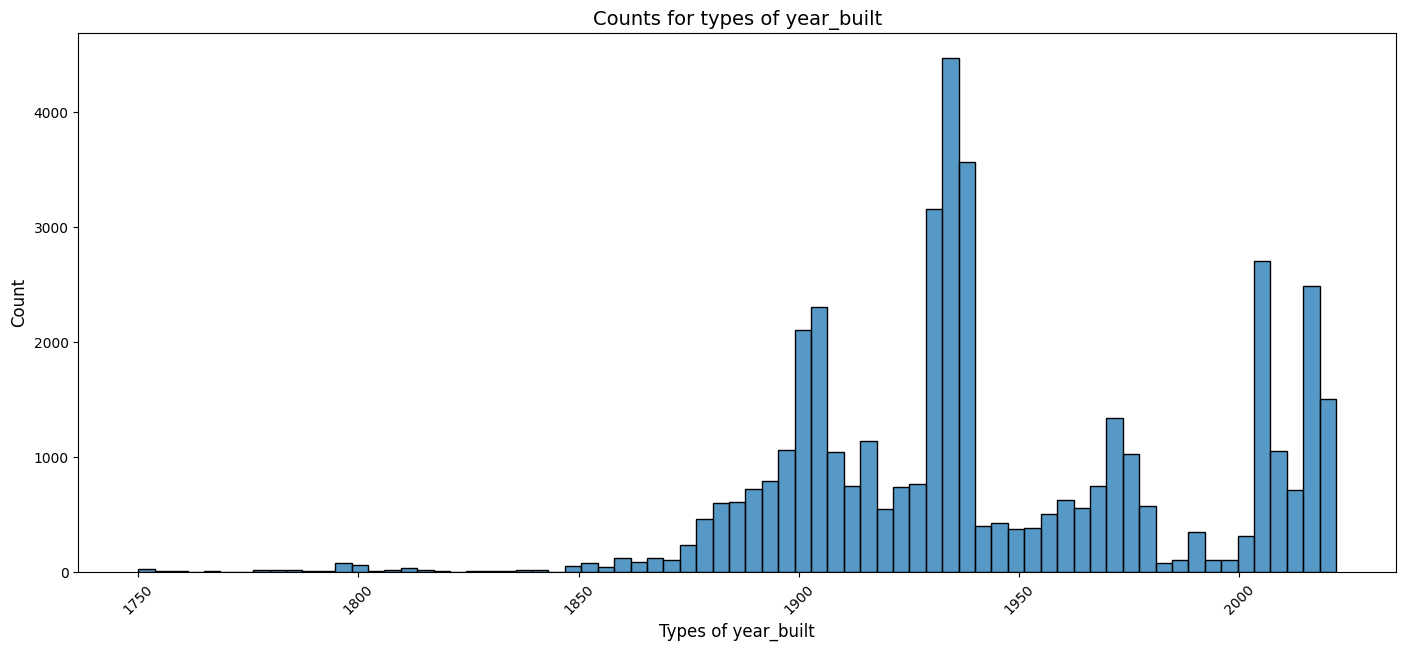

In [339]:
column_name = 'year_built'
plt.figure(figsize=(17, 7))
sns.histplot(fine_cleaning[column_name])
plt.xlabel('Types of ' + column_name, fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Counts for types of ' + column_name, fontsize=14)
plt.xticks(rotation = 45)
None #don't show the label objects

* ### num_toilets, toilet_condition_code, toilet_beskrivelse

First we find a home with 22 toilets, which must be a typo, with 2 bathrooms also. So we change the num_toilets to 2. 

In [340]:
fine_cleaning[fine_cleaning['num_toilets']>5]

,type,energy_law_applies,energy_label_classification,presale,num_floors,num_rooms,living_area,basement_area,lot_area,year_built,sold_price,address_id,weighted_area,saleDate,year_renovated,num_toilets,num_bathrooms,floors,built_in_garage_area,built_in_carport_area,built_in_outhouse_area,conservatory_area,unit_usage_code_beskrivelse,garage_outhouse_built_in,garage_outhouse_free,carport,conservatory,toilet_beskrivelse,køkken_beskrivelse,tag_beskrivelse,ydervægsmaterialebeskrivelse,heating_code.1,heating_code_additional,badeværelsebeskrivelse,postnradgadr,postnummernavn,kommune,vejnavn,husnr,dør,etage,school,roadtrain,junction,daycare,metro,doctor,soccerfield,hospital,stop,lake,supermarket,pharmacy,strain,airport,train,library,publicbath,coast,sportshall,forest,Radonrisiko,Støjmåling,Oversvømmelsesrisiko_skybrud,Meter_over_havet,Indbrudsrisiko,Bevaringsværdi,Største_parti,Valgdeltagelse,Afstemningsområde,AVM_pris,latest_prop_valuation,Year_Week,Year_Months,Year_Quarter,Kort rente,Lang rente,OMXC 25,Consumer price index,ForcedSalesOfPropertyInRegionHovedstaden,AnnualisedAgreedRate,ElPrice_incl_moms_4000kWh,BenzinPrice_incl_moms,DieselPrice_incl_moms,unemployedRate,Population,Water_view,Balcony,Opp_for_balcony,Rooftop Terrace,Terrace,House Animals,wgs84_lat,wgs84_lon,saleYear
30016,terraced house,1.0,a2015,False,3.0,5.0,114.0,NaN,NaN,2016.0,3925000,fcfb905e-9124-4baf-8890-38446e459477,114.0,2019-11-04,NaN,22.0,2.0,3.0,NaN,NaN,NaN,NaN,Række- og kædehus,NaN,3.0,NaN,NaN,Vandskyllende toilet i enheden,Eget køkken med afløb,Levende tage,Mursten,Fjernvarme/blokvarme,NaN,Badeværelse i enheden,2300,København S,København,Robert Jacobsens Vej,14N,NaN,NaN,428.33,723.15,939.78,212.77,639.49,1560.35,1521.64,5675.55,600.52,5311.4,520.67,1154.11,5356.59,6033.55,843.89,1255.78,2258.7,3036.43,3563.59,791.65,lav,55-60 dB,er lav risiko,1.4 meter,lav,0.0,venstre,81.5,2. Syd,5.311.481,2650000.0,2019W45,2019M11,2019Q4,-0.7177,0.8386,1149,103.3,23,1.414,217.428004,12.448333,11.159231,4.6,626508,0,0,0,0,0,1,55.62328,12.57299,2019


22 toilets must be a typo, so we change the number to 2, like their also is 2 num_bathrooms. 

In [341]:

fine_cleaning.loc[fine_cleaning[fine_cleaning['num_toilets']>5].index, 'num_toilets'] = 2


And we then remember, that some of the real estates does not have a toilet, given the 'toilet_condition_code'. So we remove all the NaN in 'toilet_condition_code' and then fill in 0 on the rest NaN in 'num_toilets'.

In [342]:
len(fine_cleaning[fine_cleaning['toilet_beskrivelse'].isna()])

10

In [343]:
delete_num_toilets_with_NaN_condition_code = list(fine_cleaning[fine_cleaning['toilet_beskrivelse'].isna()].index) # 10 rows

fine_cleaning.drop(delete_num_toilets_with_NaN_condition_code, inplace=True)


In [344]:
print('NaN replaced: ' + str(len(fine_cleaning.loc[fine_cleaning['num_toilets'].isna()==True])))
fine_cleaning['num_toilets'].fillna(0, inplace=True)

NaN replaced: 46


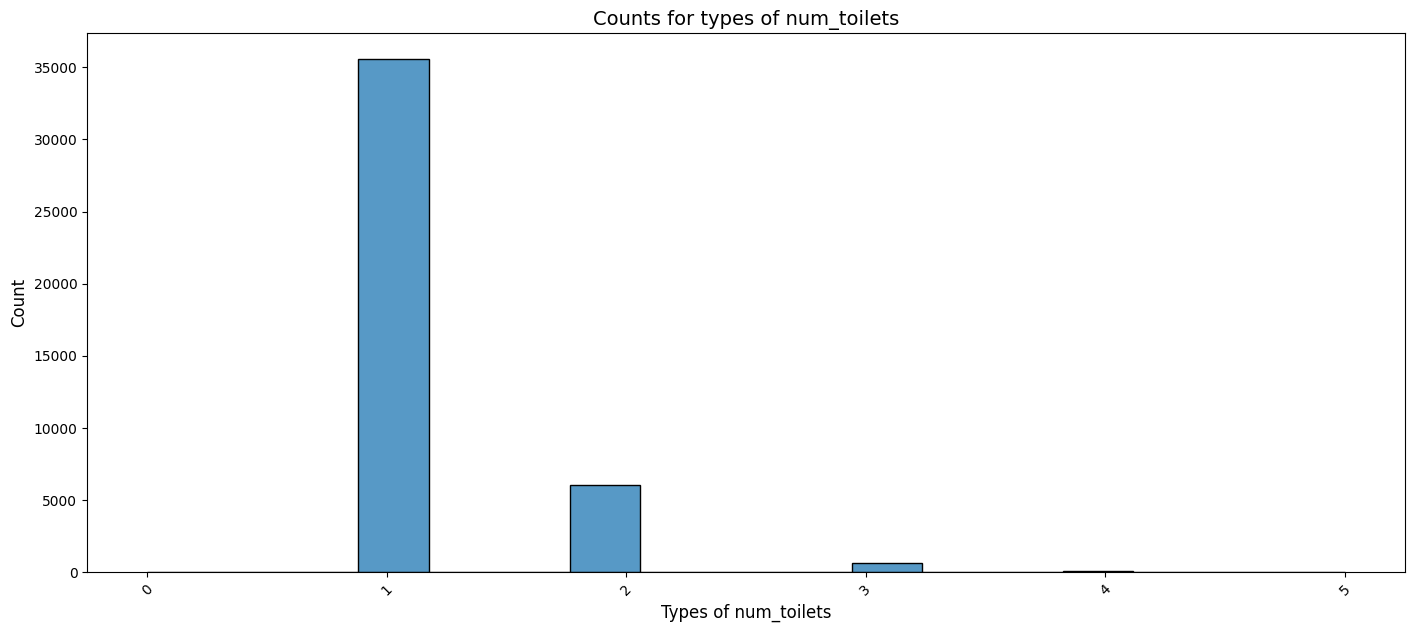

In [345]:
column_name = 'num_toilets'
plt.figure(figsize=(17, 7))
sns.histplot(fine_cleaning[column_name])
plt.xlabel('Types of ' + column_name, fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Counts for types of ' + column_name, fontsize=14)
plt.xticks(rotation = 45)
None #don't show the label objects

* ### num_bathrooms, bathroom_condition_code, badeværelsebeskrivelse

Like before, we use the samme kind of rule.
So we know that some of the real estates should not have a bathroom, given the 'bathroom_condition_code'. 
So we remove all the NaN from 'bathroom_condition_code', and then fill the rest of the NaN in 'num_bathrooms' with 0. 

In [346]:
fine_cleaning[fine_cleaning['badeværelsebeskrivelse'].isna()]

,type,energy_law_applies,energy_label_classification,presale,num_floors,num_rooms,living_area,basement_area,lot_area,year_built,sold_price,address_id,weighted_area,saleDate,year_renovated,num_toilets,num_bathrooms,floors,built_in_garage_area,built_in_carport_area,built_in_outhouse_area,conservatory_area,unit_usage_code_beskrivelse,garage_outhouse_built_in,garage_outhouse_free,carport,conservatory,toilet_beskrivelse,køkken_beskrivelse,tag_beskrivelse,ydervægsmaterialebeskrivelse,heating_code.1,heating_code_additional,badeværelsebeskrivelse,postnradgadr,postnummernavn,kommune,vejnavn,husnr,dør,etage,school,roadtrain,junction,daycare,metro,doctor,soccerfield,hospital,stop,lake,supermarket,pharmacy,strain,airport,train,library,publicbath,coast,sportshall,forest,Radonrisiko,Støjmåling,Oversvømmelsesrisiko_skybrud,Meter_over_havet,Indbrudsrisiko,Bevaringsværdi,Største_parti,Valgdeltagelse,Afstemningsområde,AVM_pris,latest_prop_valuation,Year_Week,Year_Months,Year_Quarter,Kort rente,Lang rente,OMXC 25,Consumer price index,ForcedSalesOfPropertyInRegionHovedstaden,AnnualisedAgreedRate,ElPrice_incl_moms_4000kWh,BenzinPrice_incl_moms,DieselPrice_incl_moms,unemployedRate,Population,Water_view,Balcony,Opp_for_balcony,Rooftop Terrace,Terrace,House Animals,wgs84_lat,wgs84_lon,saleYear


But we see there is no NaN in 'bathroom_condition_code', so we just fill the NaN with 0. 

In [347]:
print('NaN replaced: ' + str(len(fine_cleaning.loc[fine_cleaning['num_bathrooms'].isna()==True])))
fine_cleaning['num_bathrooms'].fillna(0, inplace=True)

NaN replaced: 478


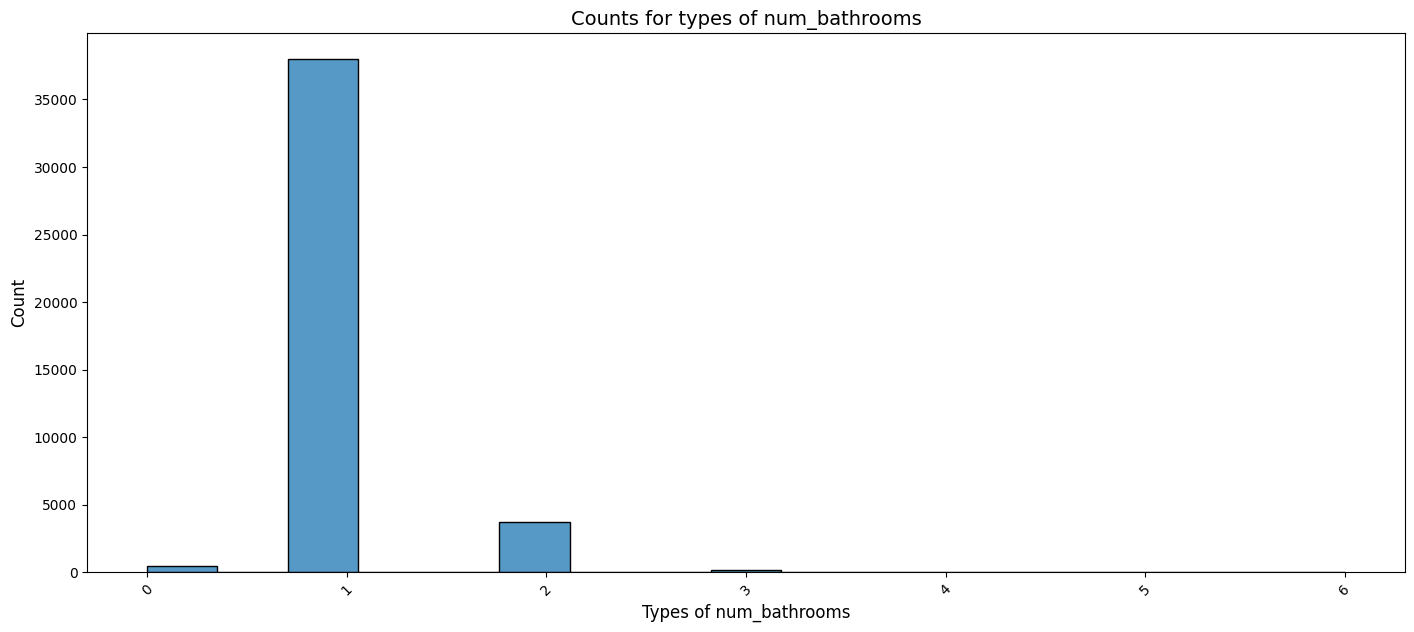

In [348]:
column_name = 'num_bathrooms'
plt.figure(figsize=(17, 7))
sns.histplot(fine_cleaning[column_name])
plt.xlabel('Types of ' + column_name, fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Counts for types of ' + column_name, fontsize=14)
plt.xticks(rotation = 45)
None #don't show the label objects

* ### wgs84_lat and wgs84_lon  

There were 50 we did not get. So we remove these ovservations

In [349]:
len(fine_cleaning[fine_cleaning['wgs84_lat'].isna()])

50

In [350]:
delete_lat_and_lon = list(fine_cleaning[fine_cleaning['wgs84_lat'].isna()].index) # 50 rows

fine_cleaning.drop(delete_lat_and_lon, inplace=True)

In [351]:
#fine_cleaning.loc[(fine_cleaning['wgs84_lon'] < 12.4509 )] # We check for wrong longtitude and latitude. (And correct them, by find the address on google maps, and get the coordinates.)

In [352]:
#index_liste = list(fine_cleaning.loc[(fine_cleaning['wgs84_lon'] < 12.4509 )].index) 
#We correct the coordinates and begin to plot.
# fine_cleaning.loc[index_liste[0], 'wgs84_lon'] = 12.519309998332567
# fine_cleaning.loc[index_liste[0], 'wgs84_lat'] = 55.66119351632339

# fine_cleaning.loc[index_liste[1], 'wgs84_lon'] = 12.57271733695044
# fine_cleaning.loc[index_liste[1], 'wgs84_lat'] = 55.72622930896577

* ### AVM_pris

In [353]:
#We keep our data to our modelling, eventhough we do not have the AVM price


print(len(fine_cleaning[fine_cleaning['AVM_pris'].isna()])) # Over 9000


fine_cleaning['AVM_pris'] = fine_cleaning['AVM_pris'].str.replace('.','').astype(np.float64) #We remove all the '.' and make it a float. 



9340


C:\Users\Mtubo\AppData\Local\Temp\ipykernel_6136\238044507.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  fine_cleaning['AVM_pris'] = fine_cleaning['AVM_pris'].str.replace('.','').astype(np.float64) #We remove all the '.' and make it a float.


* ### Støjmåling

In [354]:
len(fine_cleaning[fine_cleaning['Støjmåling'].isna()])

6140

In [355]:
delete_Støjmåling = list(fine_cleaning[fine_cleaning['Støjmåling'].isna()].index) # 33 rows

fine_cleaning.drop(delete_Støjmåling, inplace=True)

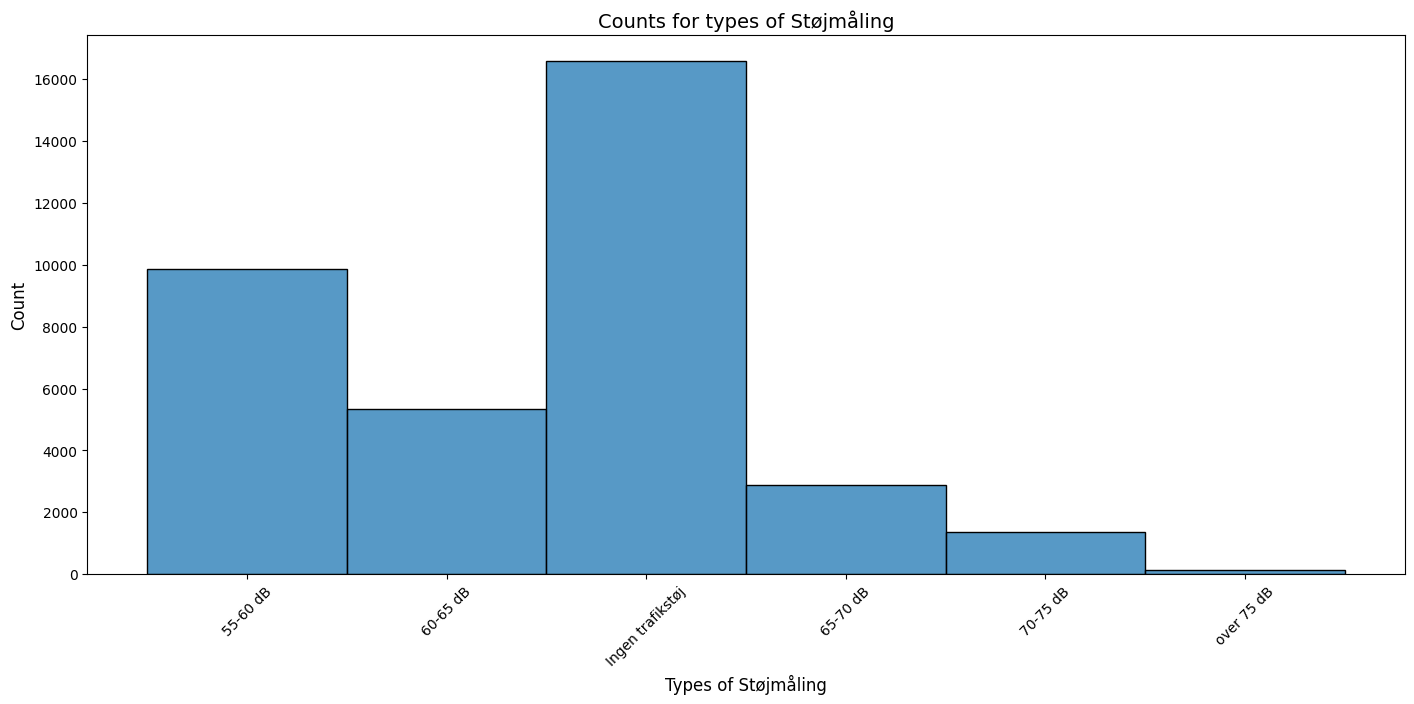

In [356]:
column_name = 'Støjmåling'
plt.figure(figsize=(17, 7))
sns.histplot(fine_cleaning[column_name])
plt.xlabel('Types of ' + column_name, fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Counts for types of ' + column_name, fontsize=14)
plt.xticks(rotation = 45)
None #don't show the label objects

* ### All the HvorLangtErDer.dk variables

In [357]:
len(fine_cleaning[fine_cleaning['school'].isna()])

107

In [358]:
delete_Hvorlangterder = list(fine_cleaning[fine_cleaning['school'].isna()].index) # 96 rows

fine_cleaning.drop(delete_Hvorlangterder, inplace=True)

* ### All the Politic variables(3)

In [359]:
len(fine_cleaning[fine_cleaning['Største_parti'].isna()])

1862

In [360]:

delete_politics = list(fine_cleaning[fine_cleaning['Største_parti'].isna()].index) # 1647 rows

fine_cleaning.drop(delete_politics, inplace=True)

* ### We remove " meter" in our column Meter_over_havet and make it a float

In [361]:
fine_cleaning['Meter_over_havet'] = fine_cleaning['Meter_over_havet'].str.replace(' meter', '').astype(np.float64) #We remove all the ' meter' and make it a float. 

In [362]:
fine_cleaning['Meter_over_havet']

1         4.1
2        12.7
3        15.5
6         2.3
7        13.1
         ... 
52436     9.8
52437     2.1
52439     5.5
52441    12.5
52443     4.0
Name: Meter_over_havet, Length: 34213, dtype: float64

* ### Living_area

In [363]:
fine_cleaning['living_area'].describe()

count    34213.000000
mean        88.905621
std         38.633276
min         23.000000
25%         60.000000
50%         80.000000
75%        107.000000
max        550.000000
Name: living_area, dtype: float64

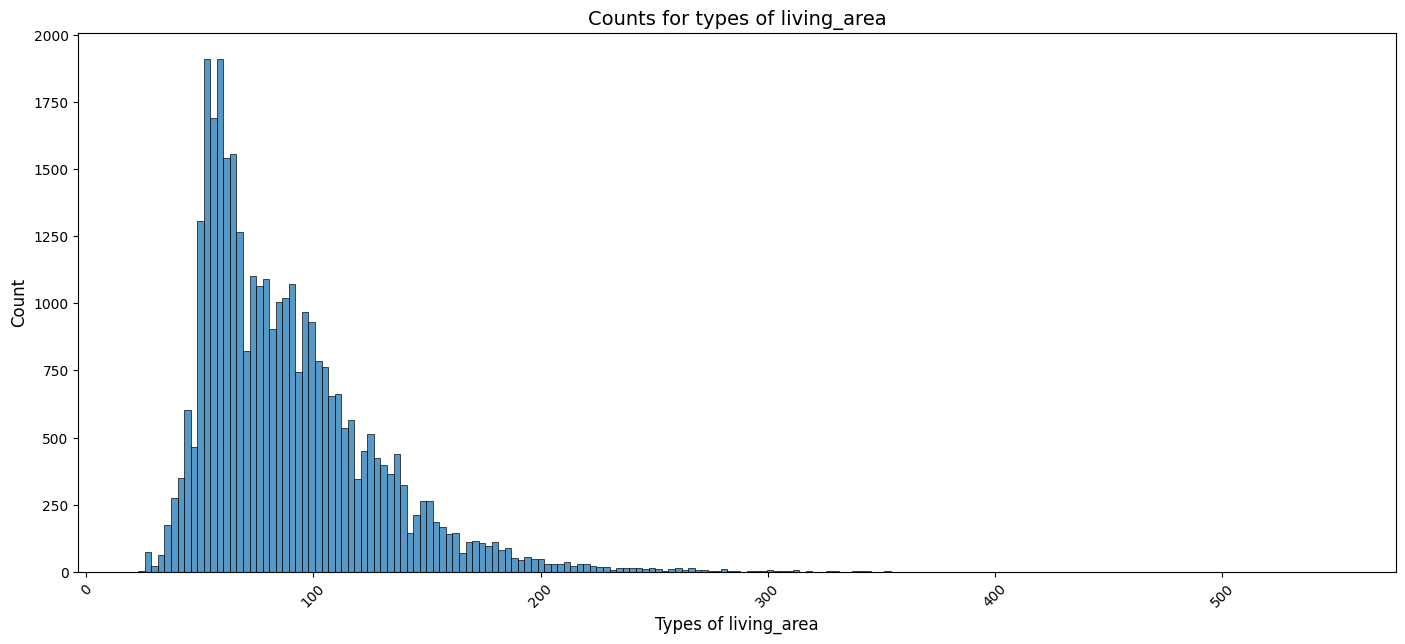

In [364]:
column_name = 'living_area'
plt.figure(figsize=(17, 7))
sns.histplot(fine_cleaning[column_name])
plt.xlabel('Types of ' + column_name, fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Counts for types of ' + column_name, fontsize=14)
plt.xticks(rotation = 45)
None #don't show the label objects

* ## weighted_area

In [365]:
fine_cleaning['weighted_area'].describe()

count    34213.000000
mean        92.907301
std         86.510092
min         23.000000
25%         60.000000
50%         81.000000
75%        112.000000
max      13648.000000
Name: weighted_area, dtype: float64

In [366]:
len(fine_cleaning.loc[fine_cleaning['weighted_area'].isna()])

0

In [367]:
#We see that there are 5 places with an weighted area above 550 square meters. But two of them seems to bee fine, because they are big villas.
fine_cleaning.loc[fine_cleaning['weighted_area']>550]

,type,energy_law_applies,energy_label_classification,presale,num_floors,num_rooms,living_area,basement_area,lot_area,year_built,sold_price,address_id,weighted_area,saleDate,year_renovated,num_toilets,num_bathrooms,floors,built_in_garage_area,built_in_carport_area,built_in_outhouse_area,conservatory_area,unit_usage_code_beskrivelse,garage_outhouse_built_in,garage_outhouse_free,carport,conservatory,toilet_beskrivelse,køkken_beskrivelse,tag_beskrivelse,ydervægsmaterialebeskrivelse,heating_code.1,heating_code_additional,badeværelsebeskrivelse,postnradgadr,postnummernavn,kommune,vejnavn,husnr,dør,etage,school,roadtrain,junction,daycare,metro,doctor,soccerfield,hospital,stop,lake,supermarket,pharmacy,strain,airport,train,library,publicbath,coast,sportshall,forest,Radonrisiko,Støjmåling,Oversvømmelsesrisiko_skybrud,Meter_over_havet,Indbrudsrisiko,Bevaringsværdi,Største_parti,Valgdeltagelse,Afstemningsområde,AVM_pris,latest_prop_valuation,Year_Week,Year_Months,Year_Quarter,Kort rente,Lang rente,OMXC 25,Consumer price index,ForcedSalesOfPropertyInRegionHovedstaden,AnnualisedAgreedRate,ElPrice_incl_moms_4000kWh,BenzinPrice_incl_moms,DieselPrice_incl_moms,unemployedRate,Population,Water_view,Balcony,Opp_for_balcony,Rooftop Terrace,Terrace,House Animals,wgs84_lat,wgs84_lon,saleYear
8871,condo,1.0,d,False,1.0,3.0,104.0,NaN,NaN,1934.0,3425500,d63b6107-58b9-42d1-ab1b-a23c6e2bf2b3,13648.0,2017-08-01,NaN,1.0,1.0,3.0,NaN,NaN,NaN,NaN,"Etagebolig-bygning, flerfamiliehus eller tofam...",NaN,NaN,NaN,NaN,Vandskyllende toilet i enheden,Eget køkken med afløb,Tegl,Mursten,Fjernvarme/blokvarme,(UDFASES) Bygningen har ingen supplerende varme,Badeværelse i enheden,2700,Brønshøj,København,Brønshøjvej,63,th,2.0,646.28,3562.89,2495.73,299.16,1530.64,300.44,1584.80,2317.74,194.45,1899.22,541.14,1044.34,1475.64,13478.31,4453.99,960.51,1656.19,5789.34,1719.12,4741.54,Meget lav,55-60 dB,kan være risiko,24.5,lav,0.0,socialdemokratiet,85.6,7. Øst,2207630.0,1500000.0,2017W31,2017M08,2017Q3,-0.51130,2.20627,1169,102.0,24,2.106,228.489718,11.490000,9.590000,5.0,606057,0,0,0,0,0,0,55.696216,12.500059,2017
27063,villa,0.0,e,False,2.0,11.0,523.0,266.0,1958.0,1872.0,61150000,0a3f50a2-8081-32b8-e044-0003ba298018,668.0,2021-06-28,NaN,4.0,4.0,2.0,NaN,NaN,NaN,21.0,Fritliggende enfamilieshus (parcelhus),NaN,108.0,NaN,21.0,Vandskyllende toilet i enheden,Eget køkken med afløb,Fibercement herunder asbest,Mursten,Fjernvarme/blokvarme,Ovne til fast eller flydende brændsel,Badeværelse i enheden,1877,Frederiksberg C,Frederiksberg,Lindevej,13,NaN,NaN,441.82,6192.98,4687.26,353.75,592.34,291.95,746.50,2131.98,273.23,1088.91,336.97,587.06,1574.47,10198.34,1919.21,702.51,1372.74,2507.06,712.94,7046.42,medium,Ingen trafikstøj,kan være risiko,6.6,lav,3.0,radikale,88.5,"10. Kreds, Søerne",NaN,16000000.0,2021W26,2021M06,2021Q2,-0.53320,1.62550,1793,104.9,16,1.758,228.421383,12.690000,10.990000,4.5,103677,0,0,0,0,1,1,55.677692,12.543476,2021
31057,villa,1.0,g,False,2.0,11.0,550.0,225.0,1295.0,1900.0,17200000,241c3f55-f81d-4df6-9bf3-ee61478919c7,643.0,2017-08-24,1928.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN,Fritliggende enfamilieshus (parcelhus),NaN,48.0,NaN,NaN,Vandskyllende toilet i enheden,Eget køkken med afløb,Tegl,Mursten,Fjernvarme/blokvarme,NaN,Badeværelse i enheden,2000,Frederiksberg,Frederiksberg,Nyelandsvej,115,NaN,NaN,430.85,5016.14,4226.28,190.97,422.32,730.04,1090.72,633.10,338.62,1612.79,707.22,641.61,697.89,12020.96,3060.44,675.05,581.08,4389.29,1658.97,5759.74,medium,55-60 dB,kan være risiko,12.7,lav,0.0,venstre,84.4,"11. Kreds, Rådhuset",NaN,13600000.0,2017W34,2017M08,2017Q3,-0.49709,2.21040,1169,102.0,24,2.106,228.489718,11.490000,9.590000,4.2,105002,0,0,0,0,0,1,55.686190,12.514810,2017
38263,condo,1.0,f,False,1.0,3.0,118.0,NaN,NaN,1882.0,2795000,0a3f50a1-09f6-32b8-e044-0003ba298018,1340.0,2017-11-07,NaN,1.0,1.0,5.0,NaN,NaN,NaN,NaN,"Etagebolig-bygning, flerfamiliehus eller tofam...",NaN,NaN,NaN,NaN,Vandskyllende toilet i enheden,Eget køkken med afløb,Fibercement herunder asbest,Mursten

In [368]:
#So we just remove the 3 apartments, where we sort them out, by taking the 5 from before and say they need to have a living_area below 150 m2. And these 3 we want to delete. 
del_WA = list(fine_cleaning.loc[fine_cleaning['weighted_area']>550].loc[fine_cleaning['living_area']<150].index)

fine_cleaning.drop(del_WA, inplace=True)

In [369]:
fine_cleaning['weighted_area'] = round(fine_cleaning['weighted_area'], 2)

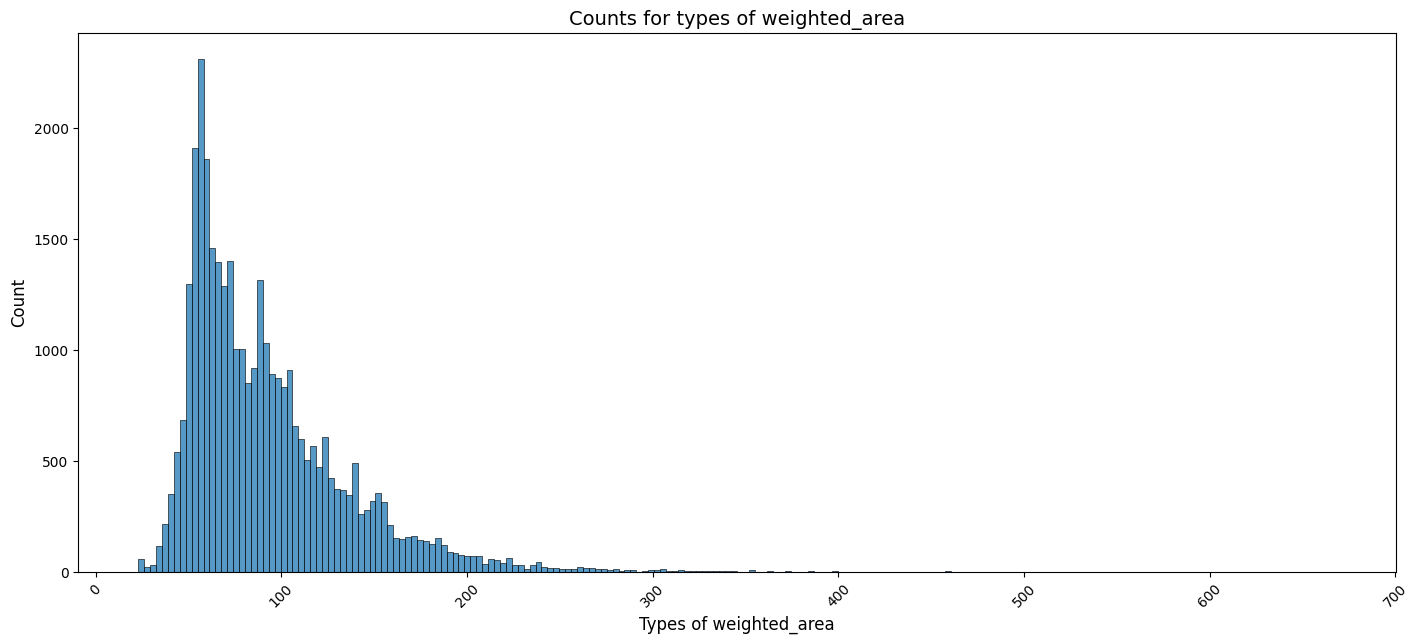

In [370]:
column_name = 'weighted_area'
plt.figure(figsize=(17, 7))
sns.histplot(fine_cleaning[column_name])
plt.xlabel('Types of ' + column_name, fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Counts for types of ' + column_name, fontsize=14)
plt.xticks(rotation = 45)
None #don't show the label objects

In [371]:
print('weighted_area == living_area is : ' + str(round((len(fine_cleaning.loc[fine_cleaning['weighted_area']==fine_cleaning['living_area']])/len(fine_cleaning))*100 , 2)) + '%')
print('weighted_area NE living_area is : ' + str(round((len(fine_cleaning.loc[fine_cleaning['weighted_area']!=fine_cleaning['living_area']])/len(fine_cleaning))*100 , 2)) + '%')

weighted_area == living_area is : 85.48%
weighted_area NE living_area is : 14.52%


In [372]:
fine_cleaning['weighted_area'] = fine_cleaning['weighted_area'].astype(np.float64)


* ## basement_area

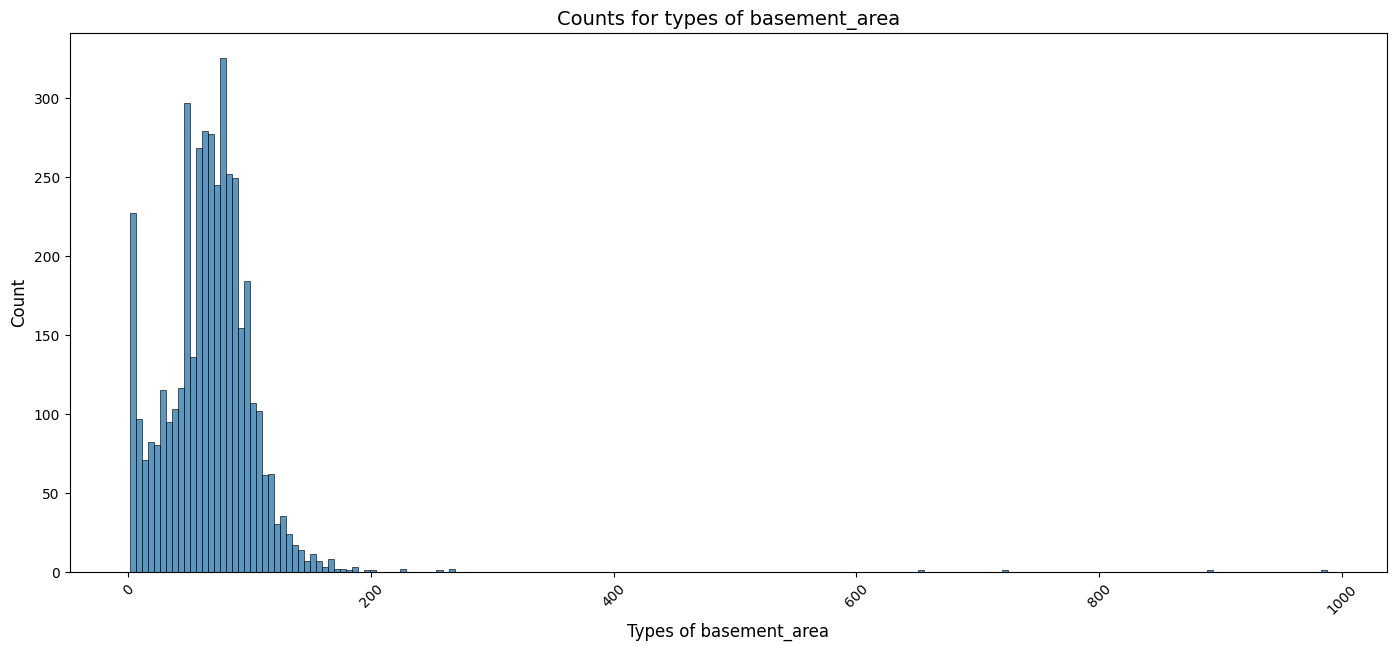

In [373]:
column_name = 'basement_area'
plt.figure(figsize=(17, 7))
sns.histplot(fine_cleaning[column_name])
plt.xlabel('Types of ' + column_name, fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Counts for types of ' + column_name, fontsize=14)
plt.xticks(rotation = 45)
None #don't show the label objects

In [374]:
fine_cleaning['basement_area'].describe()

count    4159.000000
mean       66.665545
std        40.675205
min         1.000000
25%        47.000000
50%        68.000000
75%        87.000000
max       988.000000
Name: basement_area, dtype: float64

In [375]:
fine_cleaning.loc[~fine_cleaning['basement_area'].isna()].loc[(fine_cleaning['basement_area'] > fine_cleaning['living_area']*1.4 )].loc[(fine_cleaning['basement_area'] > 200 )]

,type,energy_law_applies,energy_label_classification,presale,num_floors,num_rooms,living_area,basement_area,lot_area,year_built,sold_price,address_id,weighted_area,saleDate,year_renovated,num_toilets,num_bathrooms,floors,built_in_garage_area,built_in_carport_area,built_in_outhouse_area,conservatory_area,unit_usage_code_beskrivelse,garage_outhouse_built_in,garage_outhouse_free,carport,conservatory,toilet_beskrivelse,køkken_beskrivelse,tag_beskrivelse,ydervægsmaterialebeskrivelse,heating_code.1,heating_code_additional,badeværelsebeskrivelse,postnradgadr,postnummernavn,kommune,vejnavn,husnr,dør,etage,school,roadtrain,junction,daycare,metro,doctor,soccerfield,hospital,stop,lake,supermarket,pharmacy,strain,airport,train,library,publicbath,coast,sportshall,forest,Radonrisiko,Støjmåling,Oversvømmelsesrisiko_skybrud,Meter_over_havet,Indbrudsrisiko,Bevaringsværdi,Største_parti,Valgdeltagelse,Afstemningsområde,AVM_pris,latest_prop_valuation,Year_Week,Year_Months,Year_Quarter,Kort rente,Lang rente,OMXC 25,Consumer price index,ForcedSalesOfPropertyInRegionHovedstaden,AnnualisedAgreedRate,ElPrice_incl_moms_4000kWh,BenzinPrice_incl_moms,DieselPrice_incl_moms,unemployedRate,Population,Water_view,Balcony,Opp_for_balcony,Rooftop Terrace,Terrace,House Animals,wgs84_lat,wgs84_lon,saleYear
33329,condo,1.0,e,False,1.0,2.0,59.0,723.0,NaN,1938.0,1825000,0a3f509d-6c12-32b8-e044-0003ba298018,59.0,2019-02-06,2000.0,1.0,1.0,5.0,NaN,NaN,NaN,NaN,"Etagebolig-bygning, flerfamiliehus eller tofam...",NaN,NaN,NaN,NaN,Vandskyllende toilet i enheden,Eget køkken med afløb,Tegl,Mursten,Fjernvarme/blokvarme,(UDFASES) Bygningen har ingen supplerende varme,Badeværelse i enheden,2400,København NV,København,Bogtrykkervej,6,th,4.0,369.12,5776.35,2087.16,166.79,1005.33,339.75,477.14,818.58,394.00,1674.44,283.83,653.23,638.77,12734.64,3946.26,979.63,1542.40,3822.48,1421.61,5981.86,Meget lav,Ingen trafikstøj,kan være risiko,9.6,lav,0.0,enhedslisten,80.6,6. Bispebjerg,2347240.0,960000.0,2019W06,2019M02,2019Q1,-0.43300,2.02960,1036,102.3,13,1.922,245.126195,11.614286,10.571250,4.5,622698,0,1,0,0,0,0,55.707800,12.535626,2019
33733,condo,1.0,d,False,1.0,4.0,93.0,266.0,NaN,1913.0,4050000,0a3f50a1-7f54-32b8-e044-0003ba298018,93.0,2019-04-24,NaN,1.0,1.0,6.0,NaN,NaN,NaN,NaN,"Etagebolig-bygning, flerfamiliehus eller tofam...",NaN,NaN,NaN,NaN,Vandskyllende toilet i enheden,Eget køkken med afløb,Fibercement herunder asbest,Mursten,Fjernvarme/blokvarme,(UDFASES) Bygningen har ingen supplerende varme,Badeværelse i enheden,2300,København S,København,Ved Linden,8,tv,5.0,634.82,4679.72,4765.40,362.77,661.39,146.48,1098.19,2398.06,175.24,360.63,211.77,771.32,2409.03,6164.26,2409.03,691.86,1270.50,804.82,1556.83,5531.52,Meget lav,Ingen trafikstøj,kan være risiko,2.1,lav,0.0,enhedslisten,70.7,2. Nord,5505410.0,1700000.0,2019W17,2019M04,2019Q2,-0.43510,1.57080,1123,102.9,30,1.648,236.457500,12.315000,11.130000,4.4,623404,0,0,0,0,0,0,55.666847,12.596790,2019
43246,condo,0.0,d,False,1.0,3.0,59.0,988.0,1872.0,1902.0,2795000,0a3f509f-818b-32b8-e044-0003ba298018,59.0,2019-05-22,2001.0,1.0,1.0,5.0,NaN,NaN,NaN,NaN,"Etagebolig-bygning, flerfamiliehus eller tofam...",NaN,NaN,NaN,NaN,Vandskyllende toilet i enheden,Eget køkken med afløb,Tegl,Mursten,Fjernvarme/blokvarme,(UDFASES) Bygningen har ingen supplerende varme,Badeværelse i enheden,2300,København S,København,Holmbladsgade,54,tv,4.0,361.14,4387.58,4560.20,172.90,544.42,500.40,289.22,1596.59,23.38,1020.96,130.06,685.77,3220.65,5353.58,3220.65,423.88,347.02,1356.96,1614.93,6009.15,Meget lav,60-65 dB,kan være risiko,2.0,lav,0.0,enhedslisten,81.2,4. Nord,3520252.0,1200000.0,2019W21,2019M05,2019Q2,-0.58500,1.59420,1150,103.2,26,1.843,230.177500,12.935455,11.240000,4.3,623404,0,0,0,0,0,0,55.665333,12.609254,2019
46398,terraced house,1.0,a2015,False,3.0,6.0,184.0,893.0,12493.0,2015.0,8075000,0e826f27-6488-417d-958f-34dc7da901a1,184.0,2018-05-08,NaN,2.0,2.0,3.0,NaN,NaN,NaN,NaN,Række- og kædehus,NaN,NaN,NaN,NaN,Vandskyllende toilet i enheden,Eget køkken me

In [376]:
#So we remove the above 5 apartments/house, where we sort them out, by taking the ones with basement area and then we look for the ones with a basement area bigger than 1.4 times the living area, and then the ones with bigger basement than 200 m2
#These we remove, because it could seem like, it is BBR who have taken the hole Basement area, instead of the one which is in use for the resident. 

del_BA = list(fine_cleaning.loc[~fine_cleaning['basement_area'].isna()].loc[(fine_cleaning['basement_area'] > fine_cleaning['living_area']*1.4 )].loc[(fine_cleaning['basement_area'] > 200 )].index)

fine_cleaning.drop(del_BA, inplace=True)

In [377]:
fine_cleaning['basement_area'] = fine_cleaning['basement_area'].astype(np.float64)


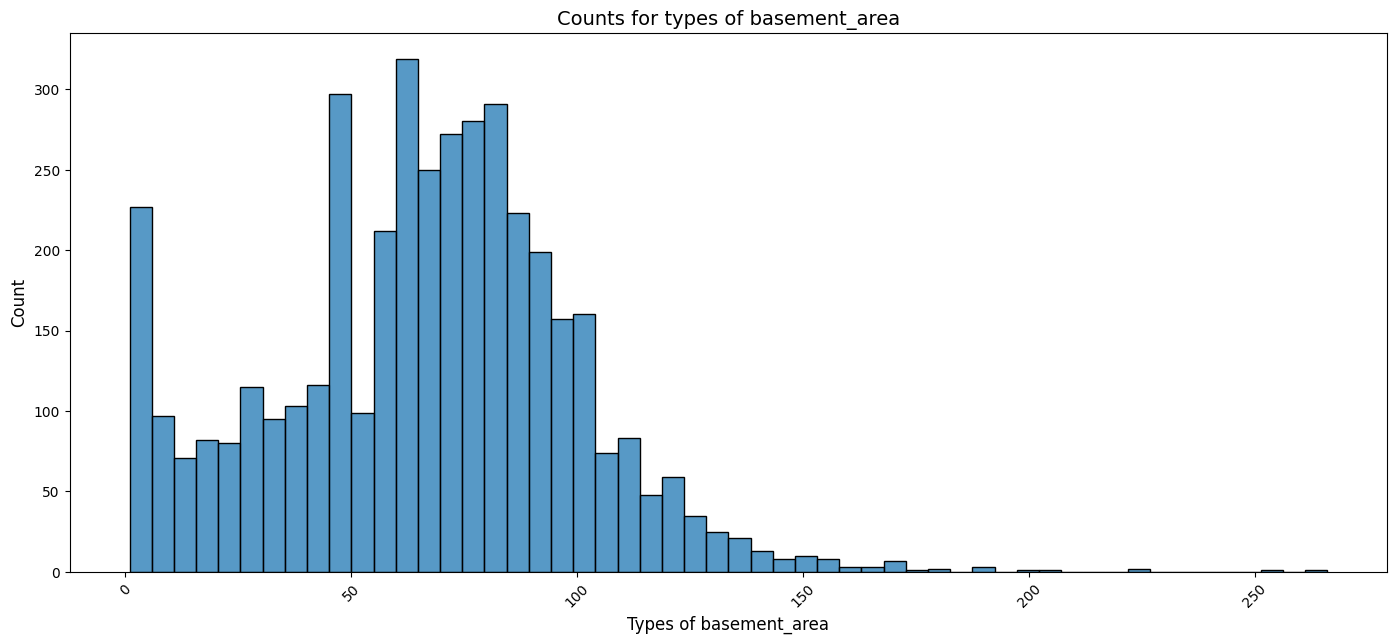

In [378]:
column_name = 'basement_area'
plt.figure(figsize=(17, 7))
sns.histplot(fine_cleaning[column_name])
plt.xlabel('Types of ' + column_name, fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Counts for types of ' + column_name, fontsize=14)
plt.xticks(rotation = 45)
None #don't show the label objects

In [379]:
fine_cleaning['basement_area'].fillna(0, inplace=True) 

In [380]:
print('For all obs. ' + str( round((len(fine_cleaning.loc[~fine_cleaning['basement_area'].isna()])/len(fine_cleaning))*100,2)) + '% have basements, in this cleaned dataset')

For all obs. 100.0% have basements, in this cleaned dataset


In [381]:
print('For all obs. '  + str( round((len(fine_cleaning.loc[~fine_cleaning['basement_area'].isna()].loc[(fine_cleaning['type'] == 'condo')])/len(fine_cleaning))*100,2)) + '% have basements if they live in condo, in this cleaned dataset')

For all obs. 82.93% have basements if they live in condo, in this cleaned dataset


In [382]:
print('For all obs. '  + str( round((len(fine_cleaning.loc[~fine_cleaning['basement_area'].isna()].loc[~(fine_cleaning['type'] == 'condo')])/len(fine_cleaning))*100,2)) + '% have basements if they NOT live in condo, in this cleaned dataset')

For all obs. 17.07% have basements if they NOT live in condo, in this cleaned dataset


In [383]:
print('For all obs. with basements, then Not Condos, the houses has basements ' + str( round((len(fine_cleaning.loc[~fine_cleaning['basement_area'].isna()].loc[~(fine_cleaning['type'] == 'condo')])/len(fine_cleaning.loc[~(fine_cleaning['type'] == 'condo')]))*100,2)) + '% of the times, in this cleaned dataset')

For all obs. with basements, then Not Condos, the houses has basements 100.0% of the times, in this cleaned dataset


* ## lot_area   

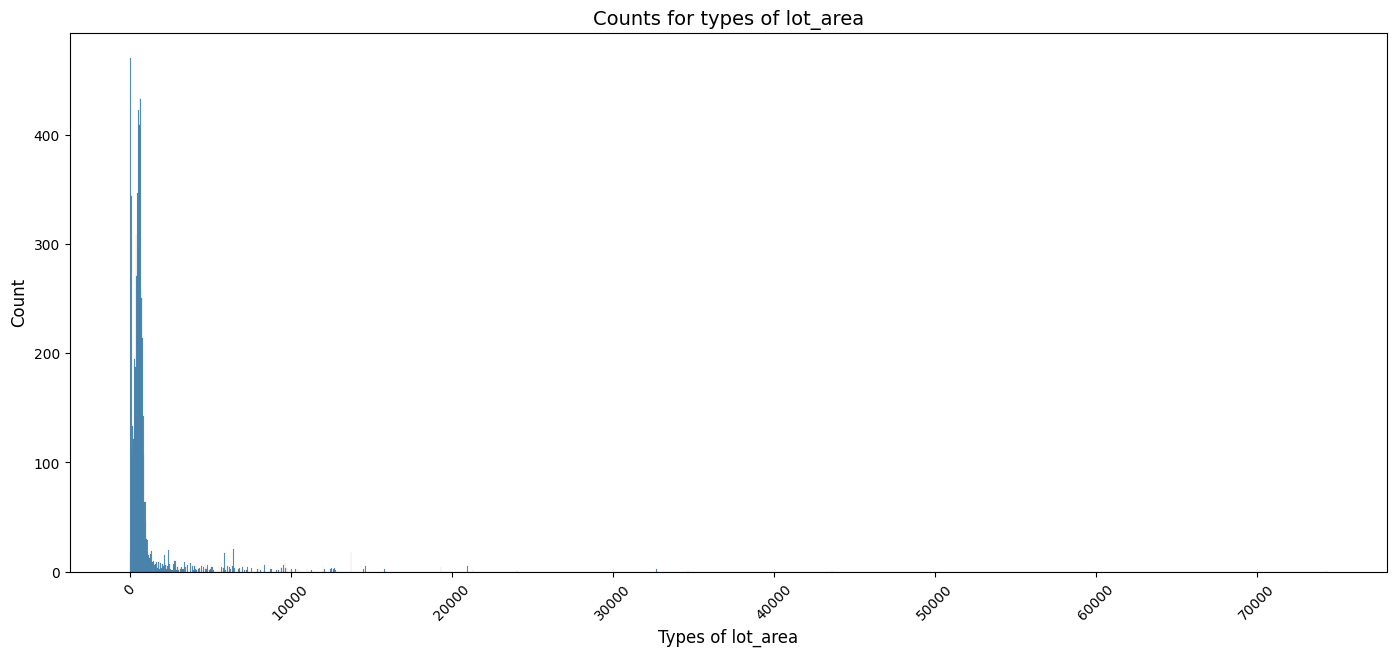

In [384]:
column_name = 'lot_area'
plt.figure(figsize=(17, 7))
sns.histplot(fine_cleaning[column_name])
plt.xlabel('Types of ' + column_name, fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Counts for types of ' + column_name, fontsize=14)
plt.xticks(rotation = 45)
None #don't show the label objects

In [385]:
fine_cleaning['lot_area'].describe()

count     6536.000000
mean       969.384639
std       2228.325526
min          1.000000
25%        361.000000
50%        571.500000
75%        748.000000
max      74394.000000
Name: lot_area, dtype: float64

In [386]:
fine_cleaning.loc[~fine_cleaning['lot_area'].isna()].loc[(fine_cleaning['lot_area'] > 250)]

,type,energy_law_applies,energy_label_classification,presale,num_floors,num_rooms,living_area,basement_area,lot_area,year_built,sold_price,address_id,weighted_area,saleDate,year_renovated,num_toilets,num_bathrooms,floors,built_in_garage_area,built_in_carport_area,built_in_outhouse_area,conservatory_area,unit_usage_code_beskrivelse,garage_outhouse_built_in,garage_outhouse_free,carport,conservatory,toilet_beskrivelse,køkken_beskrivelse,tag_beskrivelse,ydervægsmaterialebeskrivelse,heating_code.1,heating_code_additional,badeværelsebeskrivelse,postnradgadr,postnummernavn,kommune,vejnavn,husnr,dør,etage,school,roadtrain,junction,daycare,metro,doctor,soccerfield,hospital,stop,lake,supermarket,pharmacy,strain,airport,train,library,publicbath,coast,sportshall,forest,Radonrisiko,Støjmåling,Oversvømmelsesrisiko_skybrud,Meter_over_havet,Indbrudsrisiko,Bevaringsværdi,Største_parti,Valgdeltagelse,Afstemningsområde,AVM_pris,latest_prop_valuation,Year_Week,Year_Months,Year_Quarter,Kort rente,Lang rente,OMXC 25,Consumer price index,ForcedSalesOfPropertyInRegionHovedstaden,AnnualisedAgreedRate,ElPrice_incl_moms_4000kWh,BenzinPrice_incl_moms,DieselPrice_incl_moms,unemployedRate,Population,Water_view,Balcony,Opp_for_balcony,Rooftop Terrace,Terrace,House Animals,wgs84_lat,wgs84_lon,saleYear
6,condo,0.0,a2020,False,1.0,2.0,85.0,0.0,2805.0,2017.0,2995000,19e3705b-4b09-4d51-a78d-8d36c585cbfa,85.0,2017-06-28,NaN,1.0,1.0,9.0,NaN,NaN,NaN,NaN,"Etagebolig-bygning, flerfamiliehus eller tofam...",NaN,NaN,NaN,NaN,Vandskyllende toilet i enheden,Eget køkken med afløb,Tagpap med lille hældning,Betonelementer,Fjernvarme/blokvarme,Solpaneler,Badeværelse i enheden,2300,København S,København,Robert Jacobsens Vej,1A,th,7.0,459.83,552.35,769.09,66.17,617.59,1389.55,1350.94,5504.86,578.62,5343.71,504.88,983.31,5388.19,5862.75,673.20,1085.08,2236.70,3068.04,3541.69,823.16,Meget lav,55-60 dB,er lav risiko,2.3,lav,0.0,venstre,81.5,2. Syd,5495688.0,1850000.0,2017W26,2017M06,2017Q2,-0.53571,2.37995,1150,101.3,31,2.133,233.324048,11.590000,9.710000,4.9,602481,0,1,0,0,0,0,55.623884,12.575723,2017
13,villa apartment,1.0,e,False,1.0,3.0,79.0,0.0,308.0,1899.0,3499000,0a3f509d-3d14-32b8-e044-0003ba298018,90.0,2019-04-28,1977.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,"Etagebolig-bygning, flerfamiliehus eller tofam...",NaN,NaN,NaN,NaN,Vandskyllende toilet i enheden,Eget køkken med afløb,Tagpap med stor hældning,Mursten,Fjernvarme/blokvarme,(UDFASES) Bygningen har ingen supplerende varme,Badeværelse i enheden,2300,København S,København,Badensgade,8,NaN,2.0,518.47,4034.92,4306.62,170.17,218.70,215.30,577.64,1139.61,190.00,1610.60,522.48,698.73,3760.07,4909.70,3760.07,963.30,460.04,1173.46,1525.68,5856.97,Meget lav,Ingen trafikstøj,kan være risiko,2.2,lav,0.0,enhedslisten,81.2,4. Nord,NaN,NaN,2019W17,2019M04,2019Q2,-0.43510,1.57080,1123,102.9,30,1.648,236.457500,12.315000,11.130000,4.4,623404,0,0,0,0,0,0,55.662371,12.613976,2019
25,villa,0.0,d,False,1.0,5.0,112.0,58.0,336.0,1929.0,6498000,0a3f509f-856a-32b8-e044-0003ba298018,136.0,2019-08-07,1961.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,Dobbelthus,NaN,14.0,NaN,NaN,Vandskyllende toilet i enheden,Eget køkken med afløb,Tegl,Mursten,Fjernvarme/blokvarme,(UDFASES) Bygningen har ingen supplerende varme,Badeværelse i enheden,2720,Vanløse,København,Lyngholmvej,9,NaN,NaN,648.93,2937.12,3002.15,375.16,946.36,734.37,457.60,3157.56,282.89,1157.19,469.83,1020.39,549.26,14546.02,4089.31,960.67,2032.91,6348.16,549.97,3456.56,medium,Ingen trafikstøj,kan være risiko,11.8,mellem,4.0,socialdemokratiet,84.3,7. Vanløse,7379100.0,3300000.0,2019W32,2019M08,2019Q3,-0.81010,1.18170,1124,103.5,22,1.606,221.548060,12.712222,11.012222,4.3,626350,0,0,0,0,0,1,55.688450,12.480202,2019
26,villa apartment,1.0,d,False,2.0,5.0,100.0,0.0,979.0,1955.0,5320000,0a3f50a1-fbcd-32b8-e044-0003ba298018,117.0,2021-09-09,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,"Etagebolig-bygning, flerfamiliehus eller tofam...",NaN,NaN,NaN,NaN,Vandskyllende toilet i enheden,Eget køkken med afløb,Tegl,Mursten,Fjernvarme/blokva

In [387]:
print('For Obs. with lot_area, there is ' + str( round((len(fine_cleaning.loc[~fine_cleaning['lot_area'].isna()].loc[(fine_cleaning['lot_area'] > 300)])/len(fine_cleaning.loc[(fine_cleaning['lot_area']>0)]))*100,2)) + '% with an area more than 300 m2. This seems not right.')

For Obs. with lot_area, there is 79.05% with an area more than 300 m2. This seems not right.


In [388]:
#So we use lot_area as a dummy variable instead

fine_cleaning['lot_area'].fillna(0, inplace=True)
#fine_cleaning.loc[(fine_cleaning['lot_area']>0)]
#We insert 1
fine_cleaning.loc[list(fine_cleaning.loc[(fine_cleaning['lot_area']>0)].index),['lot_area']] = 1

pd.crosstab(fine_cleaning['type'], fine_cleaning['lot_area'])

lot_area,0.0,1.0
type,,
condo,27289,1078
terraced house,224,1114
villa,17,3372
villa apartment,139,972


In [389]:
fine_cleaning['lot_area'] = fine_cleaning['lot_area'].astype(np.int64)

#We rename the variable name, so it is just 'lot'
fine_cleaning.rename(columns = {'lot_area':'lot'}, inplace = True)

In [390]:
fine_cleaning

,type,energy_law_applies,energy_label_classification,presale,num_floors,num_rooms,living_area,basement_area,lot,year_built,sold_price,address_id,weighted_area,saleDate,year_renovated,num_toilets,num_bathrooms,floors,built_in_garage_area,built_in_carport_area,built_in_outhouse_area,conservatory_area,unit_usage_code_beskrivelse,garage_outhouse_built_in,garage_outhouse_free,carport,conservatory,toilet_beskrivelse,køkken_beskrivelse,tag_beskrivelse,ydervægsmaterialebeskrivelse,heating_code.1,heating_code_additional,badeværelsebeskrivelse,postnradgadr,postnummernavn,kommune,vejnavn,husnr,dør,etage,school,roadtrain,junction,daycare,metro,doctor,soccerfield,hospital,stop,lake,supermarket,pharmacy,strain,airport,train,library,publicbath,coast,sportshall,forest,Radonrisiko,Støjmåling,Oversvømmelsesrisiko_skybrud,Meter_over_havet,Indbrudsrisiko,Bevaringsværdi,Største_parti,Valgdeltagelse,Afstemningsområde,AVM_pris,latest_prop_valuation,Year_Week,Year_Months,Year_Quarter,Kort rente,Lang rente,OMXC 25,Consumer price index,ForcedSalesOfPropertyInRegionHovedstaden,AnnualisedAgreedRate,ElPrice_incl_moms_4000kWh,BenzinPrice_incl_moms,DieselPrice_incl_moms,unemployedRate,Population,Water_view,Balcony,Opp_for_balcony,Rooftop Terrace,Terrace,House Animals,wgs84_lat,wgs84_lon,saleYear
1,condo,0.0,c,False,1.0,2.0,50.0,0.0,0,1897.0,3165000,0a3f509e-0bb0-32b8-e044-0003ba298018,50.0,2022-03-20,NaN,1.0,1.0,6.0,NaN,NaN,NaN,NaN,"Etagebolig-bygning, flerfamiliehus eller tofam...",NaN,NaN,NaN,NaN,Vandskyllende toilet i enheden,Eget køkken med afløb,Betontagsten,Mursten,Fjernvarme/blokvarme,(UDFASES) Bygningen har ingen supplerende varme,Badeværelse i enheden,1669,København V,København,Flensborggade,5,tv,2.0,339.63,5212.47,4205.87,154.63,260.75,287.41,1720.86,3255.07,167.69,1132.52,307.84,462.06,1029.03,9293.53,1479.80,408.19,986.77,1333.82,1349.50,6183.10,Meget lav,55-60 dB,kan være risiko,4.1,lav,0.0,enhedslisten,89.0,9. Vesterbro,2704684.0,1050000.0,2022W11,2022M03,2022Q1,-0.41284,2.22637,1765,109.2,7,2.103,352.265314,14.856667,13.323333,3.6,643613,0,0,0,0,0,0,55.668678,12.547260,2022
2,condo,1.0,d,False,1.0,2.0,57.0,0.0,0,1895.0,2425000,0a3f50a0-20f6-32b8-e044-0003ba298018,57.0,2019-09-12,NaN,1.0,1.0,5.0,NaN,NaN,NaN,NaN,"Etagebolig-bygning, flerfamiliehus eller tofam...",NaN,NaN,NaN,NaN,Vandskyllende toilet i enheden,Eget køkken med afløb,Metal,Mursten,Fjernvarme/blokvarme,(UDFASES) Bygningen har ingen supplerende varme,Badeværelse i enheden,2200,København N,København,Peter Fabers Gade,41,NaN,0.0,211.03,7637.66,2832.17,73.19,752.79,350.53,1223.66,1101.53,236.70,776.65,123.77,799.87,1652.49,10355.18,1652.49,845.20,1555.24,2454.01,972.91,6800.53,Meget lav,55-60 dB,kan være risiko,12.7,lav,4.0,enhedslisten,82.8,5. Nørrebro,3377111.0,1150000.0,2019W37,2019M09,2019Q3,-0.76870,0.96690,1134,103.1,33,1.576,217.736057,12.500000,10.943846,4.4,626350,0,0,0,0,0,0,55.691831,12.556392,2019
3,condo,1.0,e,False,1.0,4.0,87.0,0.0,0,1958.0,1975000,0a3f50a1-efd2-32b8-e044-0003ba298018,87.0,2017-01-25,NaN,1.0,1.0,3.0,NaN,NaN,NaN,NaN,"Etagebolig-bygning, flerfamiliehus eller tofam...",NaN,NaN,NaN,NaN,Vandskyllende toilet i enheden,Eget køkken med afløb,Fibercement uden asbest,Mursten,Fjernvarme/blokvarme,(UDFASES) Bygningen har ingen supplerende varme,Badeværelse i enheden,2700,Brønshøj,København,Åfløjen,2,th,2.0,1020.08,510.81,747.69,585.56,4136.44,820.28,1682.82,2418.23,116.78,620.92,611.87,852.23,896.52,16703.30,7598.08,1204.82,1971.11,8791.08,1969.58,4130.40,Meget lav,60-65 dB,kan være risiko,15.5,mellem,0.0,socialdemokratiet,83.5,7. Nordvest,2844247.0,1100000.0,2017W04,2017M01,2017Q1,-0.32799,2.38995,1016,100.3,35,1.944,244.790000,11.432857,10.042000,5.1,601448,0,1,0,0,0,0,55.715175,12.460898,2017
6,condo,0.0,a2020,False,1.0,2.0,85.0,0.0,1,2017.0,2995000,19e3705b-4b09-4d51-a78d-8d36c585cbfa,85.0,2017-06-28,NaN,1.0,1.0,9.0,NaN,NaN,NaN,NaN,"Etagebolig-bygning, flerfamiliehus eller tofam...",NaN,NaN,NaN,NaN,Vandskyllende toilet i enheden,Eget køkken med afløb,Tagpap med l

* ## garage, carport and conservatory

In [391]:
print('built_in_garage_area in the cleaned dataset there is     : #  ' + str( len(fine_cleaning.loc[~fine_cleaning['built_in_garage_area'].isna()]) ))
print('built_in_carport_area in the cleaned dataset there is    : #   ' + str( len(fine_cleaning.loc[~fine_cleaning['built_in_carport_area'].isna()]) ))
print('built_in_outhouse_area in the cleaned dataset there is   : #  ' + str( len(fine_cleaning.loc[~fine_cleaning['built_in_outhouse_area'].isna()]) ))
print('conservatory_area in the cleaned dataset there is        : #  ' + str( len(fine_cleaning.loc[~fine_cleaning['conservatory_area'].isna()]) ))
print('garage_outhouse_built_in in the cleaned dataset there is : #   ' + str( len(fine_cleaning.loc[~fine_cleaning['garage_outhouse_built_in'].isna()]) ))
print('garage_outhouse_free in the cleaned dataset there is     : # ' + str( len(fine_cleaning.loc[~fine_cleaning['garage_outhouse_free'].isna()]) ))
print('carport in the cleaned dataset there is                  : # ' + str( len(fine_cleaning.loc[~fine_cleaning['carport'].isna()]) ))
print('conservatory in the cleaned dataset there is             : #  ' + str( len(fine_cleaning.loc[~fine_cleaning['conservatory'].isna()]) ))

built_in_garage_area in the cleaned dataset there is     : #  176
built_in_carport_area in the cleaned dataset there is    : #   12
built_in_outhouse_area in the cleaned dataset there is   : #  158
conservatory_area in the cleaned dataset there is        : #  389
garage_outhouse_built_in in the cleaned dataset there is : #   82
garage_outhouse_free in the cleaned dataset there is     : # 2634
carport in the cleaned dataset there is                  : # 1080
conservatory in the cleaned dataset there is             : #  272


In [392]:
#We replace the obsvartions for 'built_in_garage_area' with 3 and 6 in m2 to 0. This is because a garage area can't be so litlle. Also i have manuel checked in google maps. And i can see that there is no garage. 
#We make this to an dummy variable, because of the apartments with a garage basement. Where the m2 has been written as more than 200 m2.
# And rename it 

fine_cleaning.loc[list(fine_cleaning.loc[~fine_cleaning['built_in_garage_area'].isna()].loc[fine_cleaning['built_in_garage_area']<7].index),['built_in_garage_area']] = 0

fine_cleaning.loc[list(fine_cleaning.loc[~fine_cleaning['built_in_garage_area'].isna()].loc[fine_cleaning['built_in_garage_area']>0].index),['built_in_garage_area']] = 1

fine_cleaning['built_in_garage_area'].fillna(0, inplace=True)

fine_cleaning['built_in_garage_area'] = fine_cleaning['built_in_garage_area'].astype(np.int64)

fine_cleaning.rename(columns = {'built_in_garage_area':'built_in_garage'}, inplace = True)

In [393]:
#We check the max m2 of outhouse area, and drop duplicates, and see it is the same address with different 'etage' and 'dør'.
fine_cleaning.loc[fine_cleaning['built_in_outhouse_area']==198][['vejnavn', 'husnr', 'etage', 'dør']].drop_duplicates() 

,vejnavn,husnr,etage,dør
3492,Margretheholmsvej,4,3.0,tv
3909,Margretheholmsvej,4,4.0,tv
4121,Margretheholmsvej,4,6.0,th
4598,Margretheholmsvej,4,7.0,th
4857,Margretheholmsvej,4,2.0,tv
7971,Margretheholmsvej,4,5.0,tv
9271,Margretheholmsvej,4,4.0,th
10476,Margretheholmsvej,4,6.0,tv
14969,Margretheholmsvej,4,2.0,th
15761,Margretheholmsvej,4,5.0,th


In [394]:
fine_cleaning.loc[fine_cleaning['vejnavn']=='Margretheholmsvej'][['vejnavn', 'husnr', 'etage', 'dør','built_in_outhouse_area']].drop_duplicates()


,vejnavn,husnr,etage,dør,built_in_outhouse_area
882,Margretheholmsvej,45,NaN,NaN,NaN
2462,Margretheholmsvej,47,NaN,NaN,NaN
3492,Margretheholmsvej,4,3.0,tv,198.0
3909,Margretheholmsvej,4,4.0,tv,198.0
4121,Margretheholmsvej,4,6.0,th,198.0
4598,Margretheholmsvej,4,7.0,th,198.0
4857,Margretheholmsvej,4,2.0,tv,198.0
6250,Margretheholmsvej,9,NaN,NaN,NaN
7971,Margretheholmsvej,4,5.0,tv,198.0
9271,Margretheholmsvej,4,4.0,th,198.0


In [395]:
fine_cleaning['built_in_outhouse_area'].describe()

count    158.000000
mean     104.645570
std       93.903059
min        1.000000
25%        9.000000
50%      122.500000
75%      198.000000
max      198.000000
Name: built_in_outhouse_area, dtype: float64

In [396]:
#fine_cleaning.loc[fine_cleaning['built_in_outhouse_area']==198] #79 observations with the same address but different floors and doors as seen above. 

In [397]:
#We keep the rest as m2.


#We replace the observations for 'built_in_outhouse_area' for 198 m2 to 0. This is all for the same address, and i can see that it is not a built_in_outhouse_area.  
fine_cleaning.loc[list(fine_cleaning.loc[fine_cleaning['built_in_outhouse_area']==198].index),['built_in_outhouse_area']] = 0

fine_cleaning['built_in_outhouse_area'].fillna(0, inplace=True)


#We drop the 'garage_outhouse_built_in' which is a merge version of 'built_in_garage_area' and 'built_in_outhouse_area'
fine_cleaning.drop(columns=['garage_outhouse_built_in'], inplace=True)

In [398]:
#We merge 'built_in_carport_area' and 'carport'. Then we drop 'built_in_carport_area'


carport_list = list(fine_cleaning.loc[~fine_cleaning['built_in_carport_area'].isna()].loc[fine_cleaning['carport'].isna()].index) #2 observations
print(len(carport_list))

fine_cleaning.loc[carport_list[0], 'carport'] = fine_cleaning.loc[carport_list[0], 'built_in_carport_area']

fine_cleaning.loc[carport_list[1], 'carport'] = fine_cleaning.loc[carport_list[1], 'built_in_carport_area']

fine_cleaning['carport'].fillna(0, inplace=True)

#And we rename it as 

fine_cleaning.rename(columns = {'carport':'carport_area'}, inplace = True)

2


In [399]:
fine_cleaning.drop(columns=['built_in_carport_area'], inplace=True)

In [400]:
#garage_outhouse_free is garage and outhouse build free from the house. Here we do not have the two columns, which made this, like we did with 'garage_outhouse_built_in'.

fine_cleaning['garage_outhouse_free'].describe()

count    2634.000000
mean       16.473804
std        13.105240
min         1.000000
25%         6.000000
50%        15.000000
75%        22.000000
max       134.000000
Name: garage_outhouse_free, dtype: float64

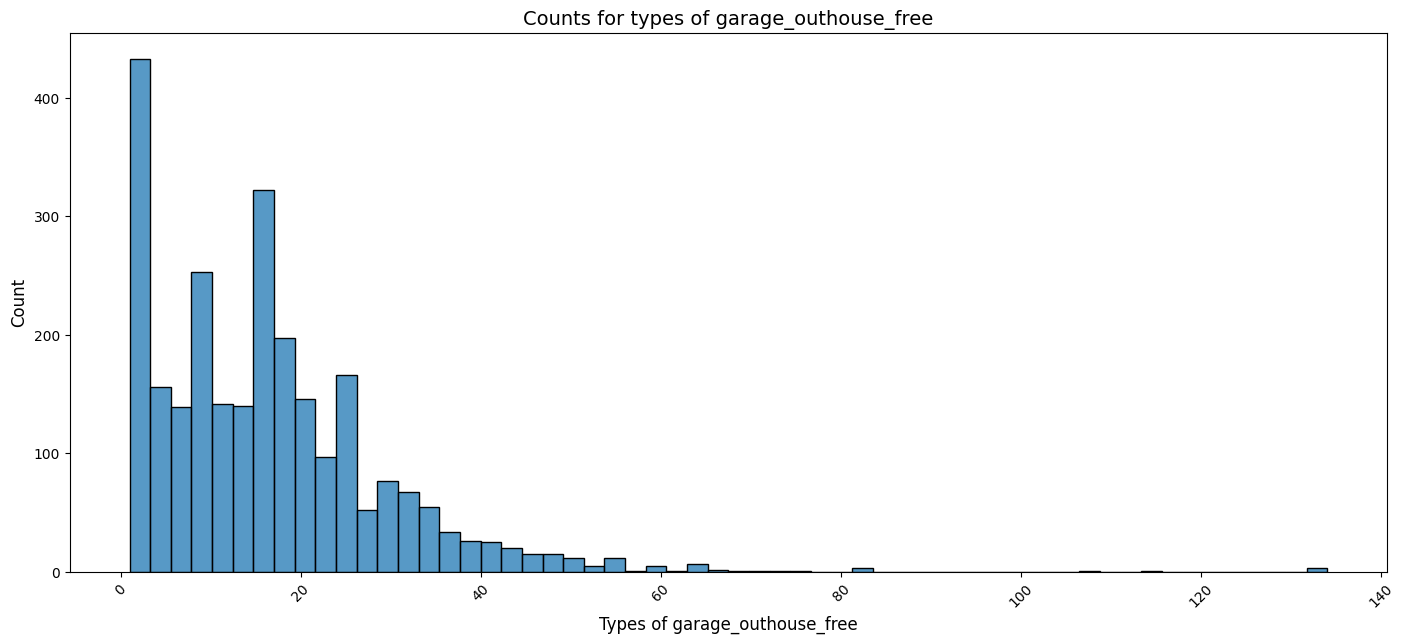

In [401]:
column_name = 'garage_outhouse_free'
plt.figure(figsize=(17, 7))
sns.histplot(fine_cleaning[column_name])
plt.xlabel('Types of ' + column_name, fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Counts for types of ' + column_name, fontsize=14)
plt.xticks(rotation = 45)
None #don't show the label objects

In [402]:
#We change the condos that is given a 'garage_outhouse_free' >= 18 to 0. I have looked at google maps, and could not see any garage or outhouse. 
# And if there is, it appears that these are common areas and not specific for the buyer.  (It 21 observations we remove it from) and in genereal the condo only has 24 observations. But the three remaning 'condo' obs are 'Rækkehuse'.

remove_free_garage_outhouse = list(fine_cleaning.loc[~fine_cleaning['garage_outhouse_free'].isna()].loc[(fine_cleaning['type']=='condo')].loc[(fine_cleaning['garage_outhouse_free']>=18)].index)
print(len(remove_free_garage_outhouse))

fine_cleaning.loc[remove_free_garage_outhouse,['garage_outhouse_free']] = 0

21


In [403]:
#We fill in NaN with 0
fine_cleaning['garage_outhouse_free'].fillna(0,inplace=True)

In [404]:
fine_cleaning.rename(columns = {'garage_outhouse_free':'garage_outhouse_free_area'}, inplace = True)

In [405]:
#All the data in 'conservatory' column is also in the 'conservatory_area' column. So we just delete 'conservatory' 
fine_cleaning.drop(columns=['conservatory'], inplace=True)

In [406]:
#And we fill in NaN with 0.
fine_cleaning['conservatory_area'].fillna(0, inplace=True)

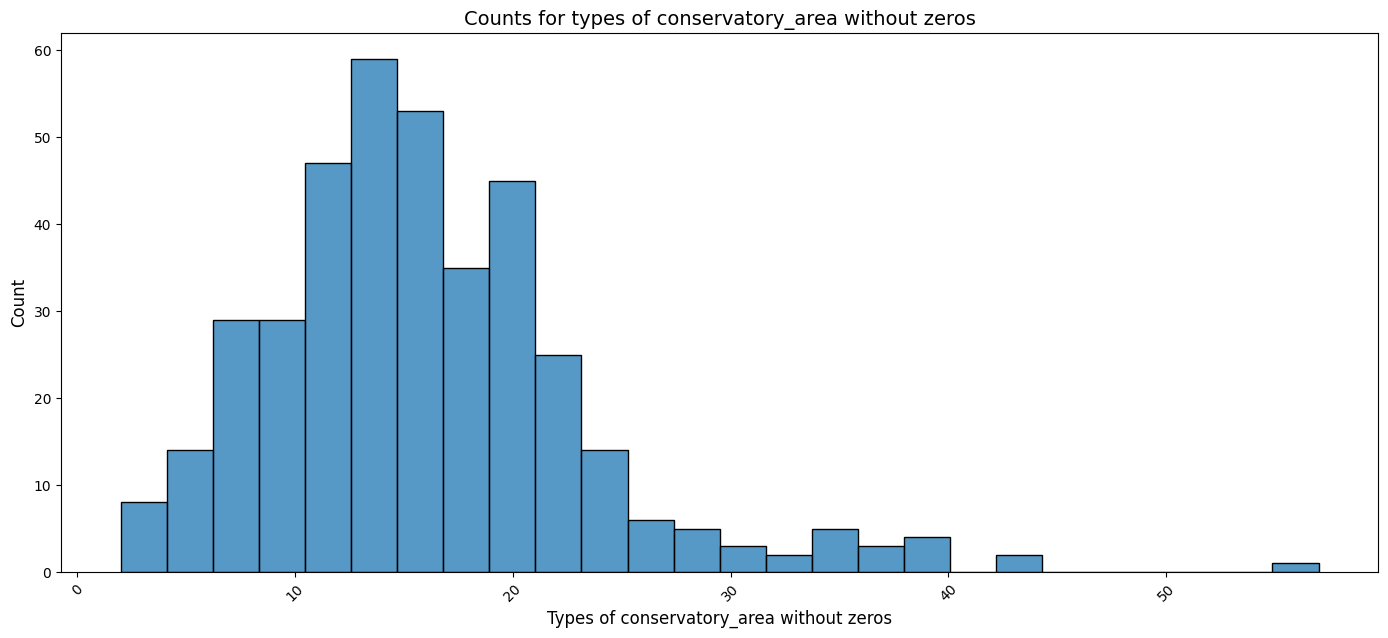

In [407]:
a = fine_cleaning.loc[fine_cleaning['conservatory_area']>0]
column_name = 'conservatory_area'
plt.figure(figsize=(17, 7))
sns.histplot(a[column_name])
plt.xlabel('Types of ' + column_name + ' without zeros', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Counts for types of ' + column_name + ' without zeros', fontsize=14)
plt.xticks(rotation = 45)
None #don't show the label objects

* ### heating_code_additional

In [408]:
#We have 8533 observations with NaN in heating_code_additional. And we inplace the code as '(UDFASES) Bygningen har ingen supplerende varme'. 
#As we treat it like is has no additional heating, but only one heating system which is given in 'heating_code.1'.

#So we make a list with the index of the NaN's and insert the above string/code.  


In [409]:
replace_NaN_in_add_heating = list(fine_cleaning.loc[fine_cleaning['heating_code_additional'].isna()].index)
print(len(replace_NaN_in_add_heating))
fine_cleaning.loc[replace_NaN_in_add_heating,['heating_code_additional']] = '(UDFASES) Bygningen har ingen supplerende varme'

8533


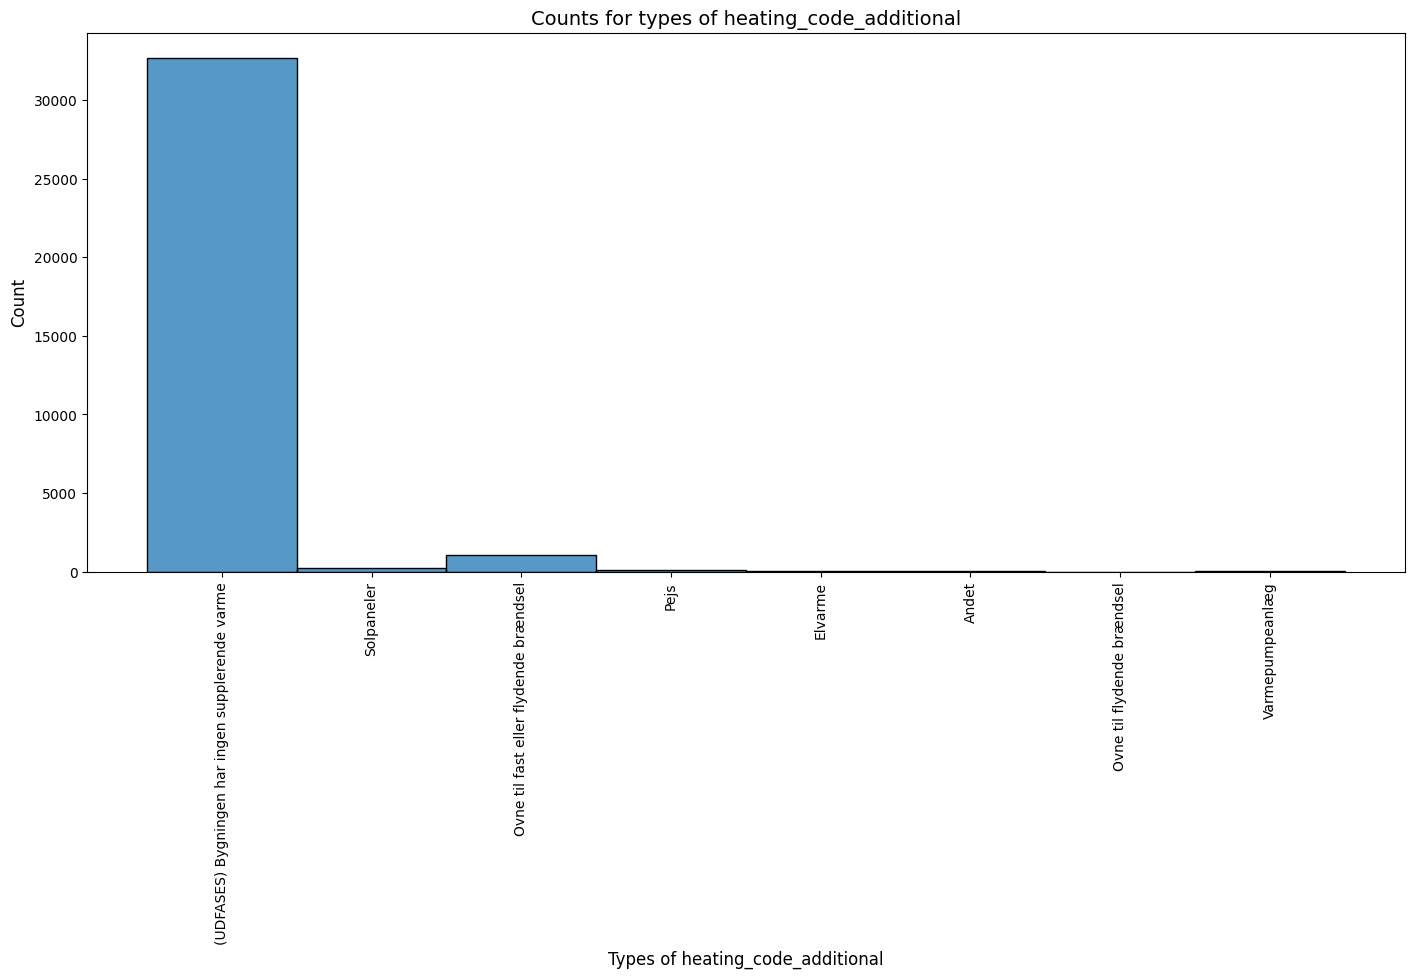

In [410]:
column_name = 'heating_code_additional'
plt.figure(figsize=(17, 7))
sns.histplot(fine_cleaning[column_name])
plt.xlabel('Types of ' + column_name, fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Counts for types of ' + column_name , fontsize=14)
plt.xticks(rotation = 90)
None #don't show the label objects

* ### floors rename to floors_in_building

In [411]:
fine_cleaning.loc[fine_cleaning['floors']<fine_cleaning['etage']][['floors', 'etage', 'living_area' , 'kommune','vejnavn', 'husnr', 'dør', 'Year_Week', 'Rooftop Terrace', 'Terrace', 'Balcony', 'sold_price', 'basement_area', 'lot', 'num_floors']]

,floors,etage,living_area,kommune,vejnavn,husnr,dør,Year_Week,Rooftop Terrace,Terrace,Balcony,sold_price,basement_area,lot,num_floors
7709,6.0,7.0,135.0,Frederiksberg,Vagtelvej,23,NaN,2021W30,0,1,0,9700000,0.0,0,1.0
8240,6.0,7.0,125.0,Frederiksberg,Vagtelvej,23,NaN,2021W44,0,1,0,8700000,0.0,0,1.0
15347,6.0,7.0,125.0,Frederiksberg,Vagtelvej,47,NaN,2017W35,0,0,0,5550000,0.0,0,1.0
15868,5.0,6.0,101.0,København,Trommesalen,3,NaN,2019W18,0,1,1,6495000,0.0,0,1.0
32264,5.0,6.0,50.0,København,Korsørgade,2,3,2019W35,0,0,1,2395000,0.0,0,1.0
33659,4.0,5.0,112.0,Frederiksberg,Brøndsteds Alle,5,NaN,2017W39,0,0,0,4430000,0.0,0,1.0
39314,3.0,4.0,102.0,København,Hyltebjerg Allé,4,NaN,2020W26,0,0,1,3150000,0.0,0,1.0
50853,3.0,4.0,139.0,København,Amager Strandvej,122A,tv,2020W23,0,1,1,7900000,0.0,0,1.0


In [412]:
#So BBR has given the floors out from: Antal etager u. kælder & tagetage

#So this is why the number of floors is less than the 'etage' of the apartment.
# But we manually inplace the right floor.  


#Vagtelvej 23, 7, has 125 m2 living area and the building has 7 floors. Rooftop Terrace




#Vagtelvej 47, 7, has 123 m2 living area and the building has 7 floors. Rooftop Terrace



#Trommesalen 3, has correct m2 living area and the building has 6 floors, but has 4m2 basement area and Rooftop Terrace (fælles) 


#Korsørgade 2 6. 3, has correct m2 living area and the building has 6 floors


#Brøndsteds Alle 5, 5,  has correct m2 living area and the building has 5 floors


#Hyltebjerg Allé 4, 4,  has correct m2 living area and the building has 4 floors


#Amager Strandvej 122A, 4. tv., has correct m2 living area and the building has 4 floors, but has 5m2 basement area and Rooftop Terrace (fælles) 



In [413]:
change_floors_equal_etage = list(fine_cleaning.loc[fine_cleaning['floors']<fine_cleaning['etage']].index)
change_floors_equal_etage

for i in range(0, len(change_floors_equal_etage)):
    fine_cleaning.loc[change_floors_equal_etage[i], 'floors'] = fine_cleaning.loc[change_floors_equal_etage[i], 'etage']

    if i == 0 or i == 1 or i == 2 or i == 3 or i == 7: #Vagtelvej 23, 7 and Vagtelvej 47, 7, and Trommesalen 3, and Amager Strandvej 122A, 4. tv. has Rooftops. some are comon. But seen on google maps.
        
        fine_cleaning.loc[change_floors_equal_etage[i], 'Rooftop Terrace'] = 1
        fine_cleaning.loc[change_floors_equal_etage[i], 'Terrace'] = 0
    
#basement_area
fine_cleaning.loc[change_floors_equal_etage[3], 'basement_area'] = 4 #Trommesalen 3 has basement_area
fine_cleaning.loc[change_floors_equal_etage[7], 'basement_area'] = 5 #Amager Strandvej 122A, 4. tv. has basement_area



In [414]:
#And finale we rename:

fine_cleaning.rename(columns = {'floors':'floors_in_building'}, inplace = True)

* ### etage

In [415]:
#We just make etage as zero for alle the villa's whit NaN in 'etage'. Just at is it is in (st.) 
#We do this so we take 'etage' with in our models, because in apartments the value can increase the higher floor you live in.
 
fine_cleaning['etage'].fillna(0, inplace=True)

# Square Meter Price

In [416]:
def Get_Prices(df_input):
    df_input = df_input.reset_index() #We reset the index order, so we can make or for-loop
    df_input.drop(columns='index', inplace=True) #From the above, it create a column called index, and we remove this column. 
    #We make an empty column for the m2 prices
    df_input['m2Price_WA'] = np.nan
    #df_input['m2Price_LA'] = np.nan
    #And we make a for-loop to insert the m2 prices. 
    for i in tqdm(range(0, len(df_input))):
        df_input.loc[i, 'm2Price_WA'] = df_input.loc[i, 'sold_price'] / df_input.loc[i, 'weighted_area']
        #df_input.loc[i, 'm2Price_LA'] = df_input.loc[i, 'sold_price'] / df_input.loc[i, 'living_area']
            
    return df_input

In [417]:
fine_cleaning = Get_Prices(fine_cleaning)

100%|██████████| 34205/34205 [00:03<00:00, 10749.03it/s]


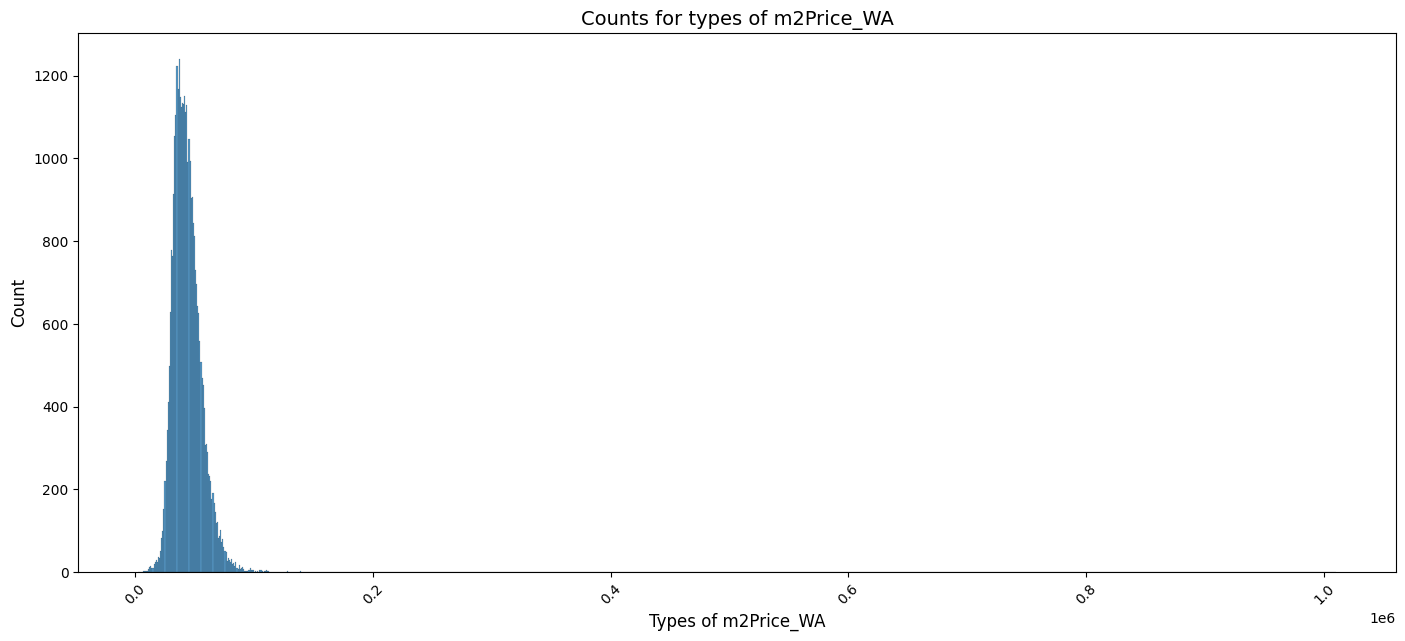

In [418]:
column_name = 'm2Price_WA'
plt.figure(figsize=(17, 7))
sns.histplot(fine_cleaning[column_name])
plt.xlabel('Types of ' + column_name, fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Counts for types of ' + column_name, fontsize=14)
plt.xticks(rotation = 45)
None #don't show the label objects

In [419]:
#We can see we have a m2 price over 500.000 DKK. Where the sold price is approx 0.1 billion. Thats seems like a mistake or it will defintly be an outlier in our dataset. So we remove it. 

fine_cleaning.loc[fine_cleaning['m2Price_WA']>500000]

,type,energy_law_applies,energy_label_classification,presale,num_floors,num_rooms,living_area,basement_area,lot,year_built,sold_price,address_id,weighted_area,saleDate,year_renovated,num_toilets,num_bathrooms,floors_in_building,built_in_garage,built_in_outhouse_area,conservatory_area,unit_usage_code_beskrivelse,garage_outhouse_free_area,carport_area,toilet_beskrivelse,køkken_beskrivelse,tag_beskrivelse,ydervægsmaterialebeskrivelse,heating_code.1,heating_code_additional,badeværelsebeskrivelse,postnradgadr,postnummernavn,kommune,vejnavn,husnr,dør,etage,school,roadtrain,junction,daycare,metro,doctor,soccerfield,hospital,stop,lake,supermarket,pharmacy,strain,airport,train,library,publicbath,coast,sportshall,forest,Radonrisiko,Støjmåling,Oversvømmelsesrisiko_skybrud,Meter_over_havet,Indbrudsrisiko,Bevaringsværdi,Største_parti,Valgdeltagelse,Afstemningsområde,AVM_pris,latest_prop_valuation,Year_Week,Year_Months,Year_Quarter,Kort rente,Lang rente,OMXC 25,Consumer price index,ForcedSalesOfPropertyInRegionHovedstaden,AnnualisedAgreedRate,ElPrice_incl_moms_4000kWh,BenzinPrice_incl_moms,DieselPrice_incl_moms,unemployedRate,Population,Water_view,Balcony,Opp_for_balcony,Rooftop Terrace,Terrace,House Animals,wgs84_lat,wgs84_lon,saleYear,m2Price_WA
26178,condo,0.0,a,True,1.0,3.0,99.0,0.0,1,2019.0,99999989,5b719429-379a-4633-abf9-bd00e99c1dac,99.0,2018-03-12,NaN,2.0,1.0,7.0,0,0.0,0.0,"Etagebolig-bygning, flerfamiliehus eller tofam...",0.0,0.0,Vandskyllende toilet i enheden,Eget køkken med afløb,Tagpap med lille hældning,Mursten,Fjernvarme/blokvarme,(UDFASES) Bygningen har ingen supplerende varme,Badeværelse i enheden,2450,København SV,København,Willy Brandts Vej,1,tv,3.0,1425.71,4627.74,3351.22,225.9,1995.55,1302.33,1938.99,4484.17,767.26,2091.67,629.5,1385.65,1540.99,8142.77,2742.75,1936.83,2280.74,51.4,2431.36,5099.33,Meget lav,60-65 dB,kan være risiko,0.0,lav,0.0,venstre,86.9,9. Sydhavn,8507969.0,2700000.0,2018W11,2018M03,2018Q1,-0.45243,2.39369,1148,101.7,32,2.188,235.760774,11.73,10.14,4.7,611822,1,1,0,0,0,0,55.657316,12.56148,2018,1.010101e+06


In [420]:
fine_cleaning.drop(list(fine_cleaning.loc[fine_cleaning['m2Price_WA']>500000].index)[0], inplace=True)

### Drop duplicated rows

A litlle bit late, but i forgot to do this in the start. But we have been sorting out, and now only have 2 duplicated we delete. 

In [421]:
fine_cleaning.drop_duplicates(inplace=True)

## Class / Type

In [422]:
pd.set_option('display.max_rows', None)
fine_cleaning.isna().sum()


type                                            0
energy_law_applies                              0
energy_label_classification                     0
presale                                         0
num_floors                                      0
num_rooms                                       0
living_area                                     0
basement_area                                   0
lot                                             0
year_built                                      0
sold_price                                      0
address_id                                      0
weighted_area                                   0
saleDate                                        0
year_renovated                              29728
num_toilets                                     0
num_bathrooms                                   0
floors_in_building                              0
built_in_garage                                 0
built_in_outhouse_area                          0


In [423]:
fine_cleaning.info(verbose = True,null_counts = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34202 entries, 0 to 34204
Data columns (total 93 columns):
 #   Column                                    Dtype         
---  ------                                    -----         
 0   type                                      object        
 1   energy_law_applies                        float64       
 2   energy_label_classification               object        
 3   presale                                   bool          
 4   num_floors                                float64       
 5   num_rooms                                 float64       
 6   living_area                               float64       
 7   basement_area                             float64       
 8   lot                                       int64         
 9   year_built                                float64       
 10  sold_price                                int64         
 11  address_id                                object        
 12  weighted_area     

C:\Users\Mtubo\AppData\Local\Temp\ipykernel_6136\1204814530.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  fine_cleaning.info(verbose = True,null_counts = False)


In [424]:
pd.reset_option('display.max_rows')

## Change to english column names and reorder columns

In [425]:
fine_cleaning.rename(columns = {'unit_usage_code_beskrivelse':'usageType'}, inplace = True)
fine_cleaning.rename(columns = {'toilet_beskrivelse':'toiletType'}, inplace = True)
fine_cleaning.rename(columns = {'køkken_beskrivelse':'kitchenType'}, inplace = True)
fine_cleaning.rename(columns = {'tag_beskrivelse':'roofType'}, inplace = True)
fine_cleaning.rename(columns = {'ydervægsmaterialebeskrivelse':'outWallMaterialType'}, inplace = True)
fine_cleaning.rename(columns = {'badeværelsebeskrivelse':'bathroomType'}, inplace = True)
fine_cleaning.rename(columns = {'postnradgadr':'zipCode'}, inplace = True)
fine_cleaning.rename(columns = {'postnummernavn':'cityName'}, inplace = True)
fine_cleaning.rename(columns = {'kommune':'municipality'}, inplace = True)
fine_cleaning.rename(columns = {'vejnavn':'addressName'}, inplace = True)
fine_cleaning.rename(columns = {'husnr':'addressNumber'}, inplace = True)
fine_cleaning.rename(columns = {'dør':'addressDoor'}, inplace = True)
fine_cleaning.rename(columns = {'etage':'addressFloor'}, inplace = True)
fine_cleaning.rename(columns = {'Radonrisiko':'radonRisk'}, inplace = True)
fine_cleaning.rename(columns = {'Støjmåling':'noiseLvl'}, inplace = True)
fine_cleaning.rename(columns = {'Oversvømmelsesrisiko_skybrud':'floodRisk'}, inplace = True)
fine_cleaning.rename(columns = {'Meter_over_havet':'MAS'}, inplace = True)
fine_cleaning.rename(columns = {'Indbrudsrisiko':'burglaryRisk'}, inplace = True)
fine_cleaning.rename(columns = {'Bevaringsværdi':'conservationValue'}, inplace = True)
fine_cleaning.rename(columns = {'Største_parti':'biggestParty'}, inplace = True)
fine_cleaning.rename(columns = {'Valgdeltagelse':'voterTurnout'}, inplace = True)
fine_cleaning.rename(columns = {'Afstemningsområde':'votingArea'}, inplace = True)
fine_cleaning.rename(columns = {'AVM_pris':'AVM_price'}, inplace = True)
fine_cleaning.rename(columns = {'Kort rente':'short_rate'}, inplace = True)
fine_cleaning.rename(columns = {'Lang rente':'long_rate'}, inplace = True)
fine_cleaning.rename(columns = {'OMXC 25':'OMXC_25'}, inplace = True)
fine_cleaning.rename(columns = {'Consumer price index':'Consumer_price_index'}, inplace = True)
fine_cleaning.rename(columns = {'House Animals':'House_Animals'}, inplace = True)
fine_cleaning.rename(columns = {'Rooftop Terrace':'Rooftop_Terrace'}, inplace = True)
fine_cleaning.rename(columns = {'heating_code.1':'heating_code'}, inplace = True)


* #### Change class

Nummerical

In [426]:
fine_cleaning['energy_law_applies'] = fine_cleaning['energy_law_applies'].astype(np.int64)
fine_cleaning['presale'] = fine_cleaning['presale'].astype(np.int64)
fine_cleaning['num_floors'] = fine_cleaning['num_floors'].astype(np.int64)
fine_cleaning['num_rooms'] = fine_cleaning['num_rooms'].astype(np.int64)
fine_cleaning['year_built'] = fine_cleaning['year_built'].astype(np.int64)
fine_cleaning['sold_price'] = fine_cleaning['sold_price'].astype(np.float64)
fine_cleaning['num_toilets'] = fine_cleaning['num_toilets'].astype(np.int64)
fine_cleaning['num_bathrooms'] = fine_cleaning['num_bathrooms'].astype(np.int64)
fine_cleaning['floors_in_building'] = fine_cleaning['floors_in_building'].astype(np.int64)
fine_cleaning['addressFloor'] = fine_cleaning['addressFloor'].astype(np.int64)
fine_cleaning['conservationValue'] = fine_cleaning['conservationValue'].astype(np.int64)
fine_cleaning['OMXC_25'] = fine_cleaning['OMXC_25'].astype(np.float64)


Categorical

In [427]:
fine_cleaning['type'] = fine_cleaning['type'].astype('category')
fine_cleaning['energy_label_classification'] = fine_cleaning['energy_label_classification'].astype('category')
fine_cleaning['usageType'] = fine_cleaning['usageType'].astype('category')
fine_cleaning['toiletType'] = fine_cleaning['toiletType'].astype('category')
fine_cleaning['bathroomType'] = fine_cleaning['bathroomType'].astype('category')
fine_cleaning['kitchenType'] = fine_cleaning['kitchenType'].astype('category')
fine_cleaning['roofType'] = fine_cleaning['roofType'].astype('category')
fine_cleaning['outWallMaterialType'] = fine_cleaning['outWallMaterialType'].astype('category')
fine_cleaning['heating_code'] = fine_cleaning['heating_code'].astype('category')
fine_cleaning['heating_code_additional'] = fine_cleaning['heating_code_additional'].astype('category')
fine_cleaning['zipCode'] = fine_cleaning['zipCode'].astype('category')
fine_cleaning['cityName'] = fine_cleaning['cityName'].astype('category')
fine_cleaning['municipality'] = fine_cleaning['municipality'].astype('category')
fine_cleaning['radonRisk'] = fine_cleaning['radonRisk'].astype('category')
fine_cleaning['noiseLvl'] = fine_cleaning['noiseLvl'].astype('category')
fine_cleaning['floodRisk'] = fine_cleaning['floodRisk'].astype('category')
fine_cleaning['burglaryRisk'] = fine_cleaning['burglaryRisk'].astype('category')
fine_cleaning['biggestParty'] = fine_cleaning['biggestParty'].astype('category')
fine_cleaning['votingArea'] = fine_cleaning['votingArea'].astype('category')
fine_cleaning['addressName'] = fine_cleaning['addressName'].astype('category')
fine_cleaning['addressNumber'] = fine_cleaning['addressNumber'].astype('category')
fine_cleaning['addressDoor'] = fine_cleaning['addressDoor'].astype('category')
fine_cleaning['address_id'] = fine_cleaning['address_id'].astype('category')

In [428]:
len(fine_cleaning.columns)

93

In [429]:
#We reorder or variables as we like:
fine_cleaning2 = fine_cleaning[['type', 'energy_law_applies', 'energy_label_classification', 'presale', 'year_built', 'year_renovated', 'sold_price', 'saleDate', 'saleYear', 'num_floors', 'floors_in_building', 'num_rooms', 'num_toilets', 'num_bathrooms', 'living_area', 'basement_area', 'weighted_area', 'built_in_outhouse_area', 'carport_area', 'garage_outhouse_free_area', 'conservatory_area', 'built_in_garage', 'lot', 'usageType', 'toiletType', 'bathroomType', 'kitchenType', 'roofType', 'outWallMaterialType', 'heating_code', 'heating_code_additional', 'zipCode', 'cityName', 'municipality', 'addressFloor', 'm2Price_WA', 'Water_view', 'Balcony', 'Opp_for_balcony', 'Rooftop_Terrace', 'Terrace', 'House_Animals', 'wgs84_lat', 'wgs84_lon', 'school', 'roadtrain', 'junction', 'daycare', 'metro', 'doctor', 'soccerfield', 'hospital', 'stop', 'lake', 'supermarket', 'pharmacy', 'strain', 'airport', 'train', 'library', 'publicbath', 'coast', 'sportshall', 'forest', 'radonRisk', 'noiseLvl', 'floodRisk', 'MAS', 'burglaryRisk', 'conservationValue', 'biggestParty', 'voterTurnout', 'votingArea', 'short_rate', 'long_rate', 'OMXC_25', 'Consumer_price_index', 'ForcedSalesOfPropertyInRegionHovedstaden', 'unemployedRate', 'Population', 'AnnualisedAgreedRate', 'ElPrice_incl_moms_4000kWh', 'BenzinPrice_incl_moms', 'DieselPrice_incl_moms', 'AVM_price', 'latest_prop_valuation', 'Year_Week', 'Year_Months', 'Year_Quarter', 'addressName', 'addressNumber', 'addressDoor', 'address_id']]


In [430]:
len(fine_cleaning2.columns)

93

In [431]:
len(fine_cleaning2)

34202

In [432]:
fine_cleaning2.to_csv('fine_cleaning_06_Nov.csv', index = False)
fine_cleaning2.to_excel("fine_cleaning_06_Nov.xlsx")
fine_cleaning2.to_excel("fine_cleaning.xlsx")